In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

In [2]:
freq_little = 'frequency_little.xlsx'
freq_big = 'frequency_big.xlsx'
little_data = pd.read_excel(freq_little)
big_data = pd.read_excel(freq_big)

# Ensure data are numeric values.
little_freq = pd.to_numeric(little_data['Frequency little CPU'])
little_power = pd.to_numeric(little_data['Power'])
little_fps = pd.to_numeric(little_data['Frame rate (FPS)'])
little_latency = pd.to_numeric(little_data['Latency (ms)'])

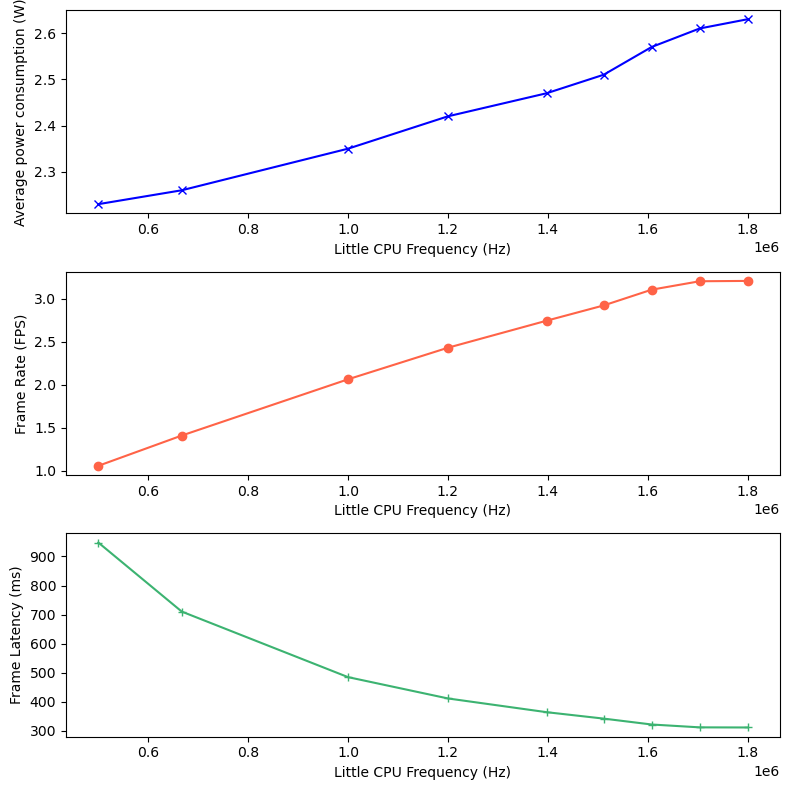

In [3]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8))

ax[0].plot(little_freq, little_power, marker='x', color='blue')
ax[0].set_xlabel('Little CPU Frequency (Hz)')
ax[0].set_ylabel('Average power consumption (W)')
ax[1].plot(little_freq, little_fps, marker='o', color='tomato')
ax[1].set_xlabel('Little CPU Frequency (Hz)')
ax[1].set_ylabel('Frame Rate (FPS)')
ax[2].plot(little_freq, little_latency, marker='+', color='mediumseagreen')
ax[2].set_xlabel('Little CPU Frequency (Hz)')
ax[2].set_ylabel('Frame Latency (ms)')

plt.tight_layout()
plt.savefig('frequency-little.png', bbox_inches="tight", dpi=300)
plt.show()

In [4]:
# Ensure data are numeric values.
big_freq = pd.to_numeric(big_data['Frequency big CPU'])
big_power = pd.to_numeric(big_data['Power'])
big_fps = pd.to_numeric(big_data['Frame rate (FPS)'])
big_latency = pd.to_numeric(big_data['Latency (ms)'])

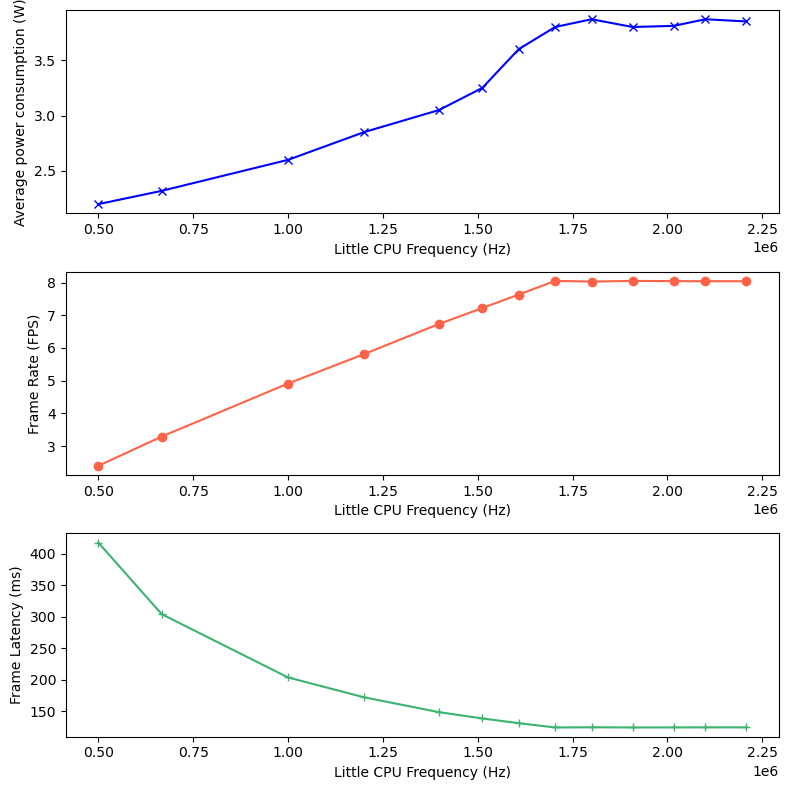

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8))

ax[0].plot(big_freq, big_power, marker='x', color='blue')
ax[0].set_xlabel('Little CPU Frequency (Hz)')
ax[0].set_ylabel('Average power consumption (W)')
ax[1].plot(big_freq, big_fps, marker='o', color='tomato')
ax[1].set_xlabel('Little CPU Frequency (Hz)')
ax[1].set_ylabel('Frame Rate (FPS)')
ax[2].plot(big_freq, big_latency, marker='+', color='mediumseagreen')
ax[2].set_xlabel('Little CPU Frequency (Hz)')
ax[2].set_ylabel('Frame Latency (ms)')

plt.tight_layout()
plt.savefig('frequency-big.png', bbox_inches="tight", dpi=300)
plt.show()

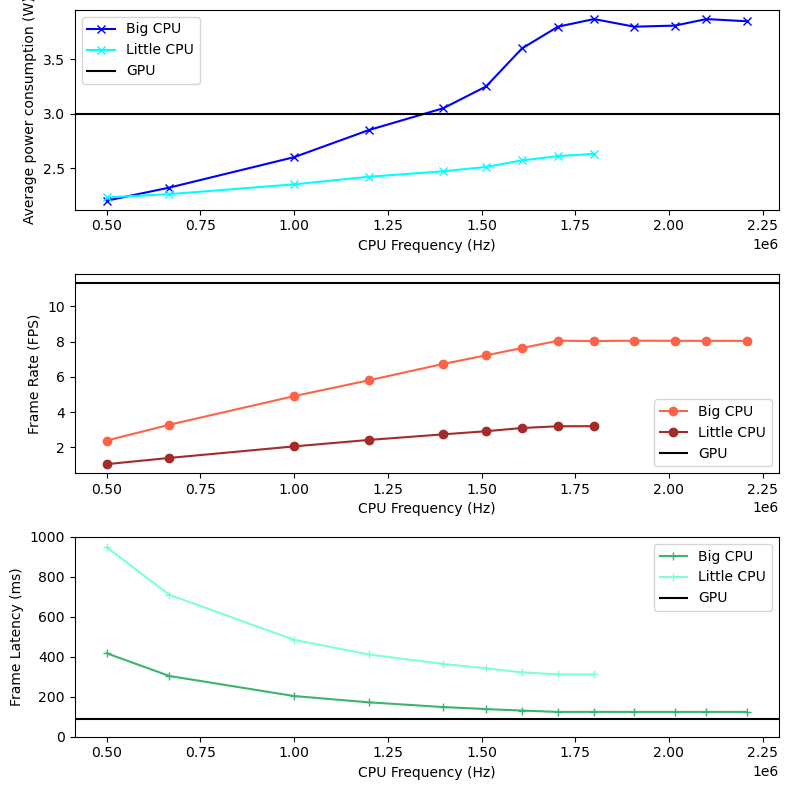

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8))

ax[0].plot(big_freq, big_power, marker='x', color='blue', label='Big CPU')
ax[0].plot(little_freq, little_power, marker='x', color='aqua', label='Little CPU')
ax[0].axhline(y=3.00, color='black', label='GPU')
ax[0].set_xlabel('CPU Frequency (Hz)')
ax[0].set_ylabel('Average power consumption (W)')
ax[0].legend()

ax[1].plot(big_freq, big_fps, marker='o', color='tomato', label='Big CPU')
ax[1].plot(little_freq, little_fps, marker='o', color='brown', label='Little CPU')
ax[1].axhline(y=11.3434, color='black', label='GPU')
ax[1].set_xlabel('CPU Frequency (Hz)')
ax[1].set_ylabel('Frame Rate (FPS)')
ax[1].legend()

ax[2].plot(big_freq, big_latency, marker='+', color='mediumseagreen', label='Big CPU')
ax[2].plot(little_freq, little_latency, marker='+', color='aquamarine', label='Little CPU')
ax[2].axhline(y=88.156, color='black', label='GPU')
ax[2].set_xlabel('CPU Frequency (Hz)')
ax[2].set_ylabel('Frame Latency (ms)')
ax[2].set_ylim([0, 1000])
ax[2].legend()

plt.tight_layout()
plt.savefig('frequency-all.png', bbox_inches="tight", dpi=300)
plt.show()

In [7]:
low_measurements = 'low_measurements.xlsx'
low_data = pd.read_excel(low_measurements)
low_blg = low_data.loc[low_data['order'] == 'B-L-G']

In [8]:
low_blg_matrix = np.zeros((7, 7))

for row in range(len(low_blg)):
    partition1 = low_blg['partition point 1'].iloc[row]
    partition2 = low_blg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_blg_matrix[partition1 - 1][partition2 - 1] = low_blg['power'].iloc[row]

In [9]:
low_bgl = low_data.loc[low_data['order'] == 'B-G-L']
low_bgl_matrix = np.zeros((7, 7))

for row in range(len(low_bgl)):
    partition1 = low_bgl['partition point 1'].iloc[row]
    partition2 = low_bgl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_bgl_matrix[partition1 - 1][partition2 - 1] = low_bgl['power'].iloc[row]

In [10]:
low_lbg = low_data.loc[low_data['order'] == 'L-B-G']
low_lbg_matrix = np.zeros((7, 7))

for row in range(len(low_lbg)):
    partition1 = low_lbg['partition point 1'].iloc[row]
    partition2 = low_lbg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lbg_matrix[partition1 - 1][partition2 - 1] = low_lbg['power'].iloc[row]

In [11]:
low_lgb = low_data.loc[low_data['order'] == 'L-G-B']
low_lgb_matrix = np.zeros((7, 7))

for row in range(len(low_lgb)):
    partition1 = low_lgb['partition point 1'].iloc[row]
    partition2 = low_lgb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lgb_matrix[partition1 - 1][partition2 - 1] = low_lgb['power'].iloc[row]

In [12]:
low_gbl = low_data.loc[low_data['order'] == 'G-B-L']
low_gbl_matrix = np.zeros((7, 7))

for row in range(len(low_gbl)):
    partition1 = low_gbl['partition point 1'].iloc[row]
    partition2 = low_gbl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_gbl_matrix[partition1 - 1][partition2 - 1] = low_gbl['power'].iloc[row]

In [13]:
low_glb = low_data.loc[low_data['order'] == 'G-L-B']
low_glb_matrix = np.zeros((7, 7))

for row in range(len(low_glb)):
    partition1 = low_glb['partition point 1'].iloc[row]
    partition2 = low_glb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_glb_matrix[partition1 - 1][partition2 - 1] = low_glb['power'].iloc[row]

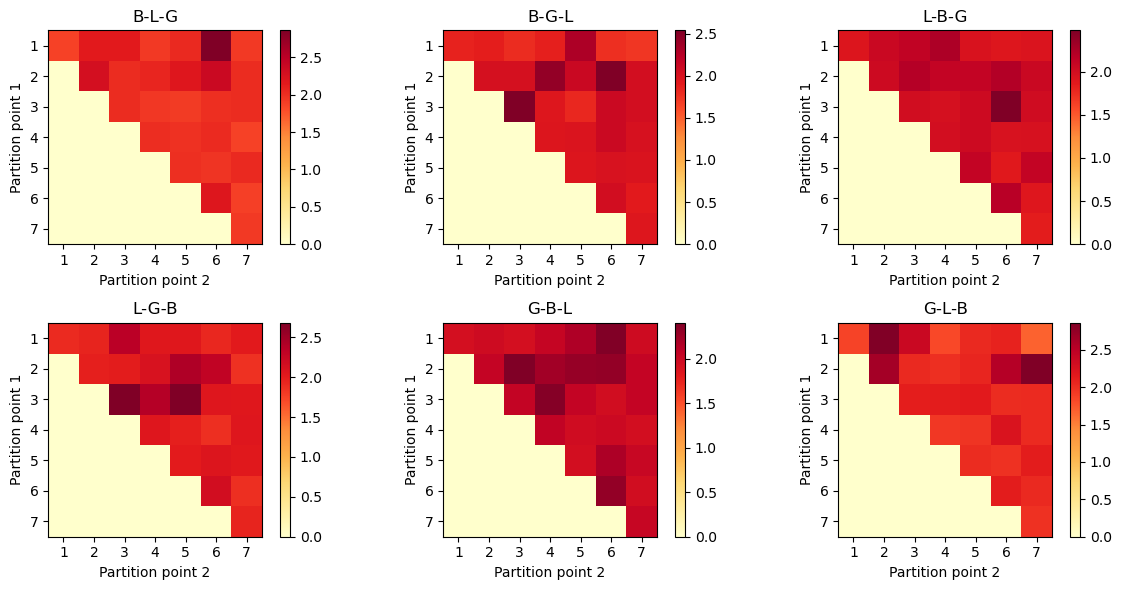

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

labels = ['1', '2', '3', '4', '5', '6', '7']

# Plot the heatmap with custom colors and annotations
im_blg = ax[0][0].imshow(low_blg_matrix, cmap='YlOrRd', vmin=low_blg_matrix.min(), vmax=low_blg_matrix.max())
im_bgl = ax[0][1].imshow(low_bgl_matrix, cmap='YlOrRd', vmin=low_bgl_matrix.min(), vmax=low_bgl_matrix.max())
im_lbg = ax[0][2].imshow(low_lbg_matrix, cmap='YlOrRd', vmin=low_lbg_matrix.min(), vmax=low_lbg_matrix.max())
im_lgb = ax[1][0].imshow(low_lgb_matrix, cmap='YlOrRd', vmin=low_lgb_matrix.min(), vmax=low_lgb_matrix.max())
im_gbl = ax[1][1].imshow(low_gbl_matrix, cmap='YlOrRd', vmin=low_gbl_matrix.min(), vmax=low_gbl_matrix.max())
im_glb = ax[1][2].imshow(low_glb_matrix, cmap='YlOrRd', vmin=low_glb_matrix.min(), vmax=low_glb_matrix.max())

# Add colorbar
cbar_blg = ax[0][0].figure.colorbar(im_blg, ax = ax[0][0])
cbar_bgl = ax[0][1].figure.colorbar(im_bgl, ax = ax[0][1])
cbar_lbg = ax[0][2].figure.colorbar(im_lbg, ax = ax[0][2])
cbar_lgb = ax[1][0].figure.colorbar(im_lgb, ax = ax[1][0])
cbar_gbl = ax[1][1].figure.colorbar(im_gbl, ax = ax[1][1])
cbar_glb = ax[1][2].figure.colorbar(im_glb, ax = ax[1][2])
 
# Set plot title and axis labels
ax[0][0].set_title("B-L-G")
ax[0][0].set_xlabel("Partition point 2")
ax[0][0].set_ylabel("Partition point 1")
ax[0][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][1].set_title("B-G-L")
ax[0][1].set_xlabel("Partition point 2")
ax[0][1].set_ylabel("Partition point 1")
ax[0][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][2].set_title("L-B-G")
ax[0][2].set_xlabel("Partition point 2")
ax[0][2].set_ylabel("Partition point 1")
ax[0][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][2].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][0].set_title("L-G-B")
ax[1][0].set_xlabel("Partition point 2")
ax[1][0].set_ylabel("Partition point 1")
ax[1][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][1].set_title("G-B-L")
ax[1][1].set_xlabel("Partition point 2")
ax[1][1].set_ylabel("Partition point 1")
ax[1][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][2].set_title("G-L-B")
ax[1][2].set_xlabel("Partition point 2")
ax[1][2].set_ylabel("Partition point 1")
ax[1][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][2].set_yticks(np.arange(len(labels)), labels=labels)

plt.tight_layout()
plt.savefig('heatmap-power_low_freq.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

In [15]:
low_measurements = 'frequency-high-all.xlsx'
low_data = pd.read_excel(low_measurements)

In [16]:
low_blg = low_data.loc[low_data['order'] == 'B-L-G']
low_blg_matrix = np.zeros((7, 7))

for row in range(len(low_blg)):
    partition1 = low_blg['partition point 1'].iloc[row]
    partition2 = low_blg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_blg_matrix[partition1 - 1][partition2 - 1] = low_blg['power'].iloc[row]

In [17]:
low_bgl = low_data.loc[low_data['order'] == 'B-G-L']
low_bgl_matrix = np.zeros((7, 7))

for row in range(len(low_bgl)):
    partition1 = low_bgl['partition point 1'].iloc[row]
    partition2 = low_bgl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_bgl_matrix[partition1 - 1][partition2 - 1] = low_bgl['power'].iloc[row]

In [18]:
low_lbg = low_data.loc[low_data['order'] == 'L-B-G']
low_lbg_matrix = np.zeros((7, 7))

for row in range(len(low_lbg)):
    partition1 = low_lbg['partition point 1'].iloc[row]
    partition2 = low_lbg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lbg_matrix[partition1 - 1][partition2 - 1] = low_lbg['power'].iloc[row]

In [19]:
low_lgb = low_data.loc[low_data['order'] == 'L-G-B']
low_lgb_matrix = np.zeros((7, 7))

for row in range(len(low_lgb)):
    partition1 = low_lgb['partition point 1'].iloc[row]
    partition2 = low_lgb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lgb_matrix[partition1 - 1][partition2 - 1] = low_lgb['power'].iloc[row]

print(low_lgb_matrix)

[[4.01388889 3.63615789 4.02152632 3.95778571 3.8573     3.68922222
         nan]
 [0.                nan 3.566225   3.539      3.4045     3.13266667
  3.32622222]
 [0.         0.         3.84623077 3.4224     3.17371429 3.48990909
  3.0206    ]
 [0.         0.         0.         3.518125   3.27245455 3.30314286
  3.06416667]
 [0.         0.         0.         0.         6.26733333 3.1304
  2.8328    ]
 [0.         0.         0.         0.         0.         2.52033333
  2.636     ]
 [0.         0.         0.         0.         0.         0.
  2.62325   ]]


In [20]:
low_gbl = low_data.loc[low_data['order'] == 'G-B-L']
low_gbl_matrix = np.zeros((7, 7))

for row in range(len(low_gbl)):
    partition1 = low_gbl['partition point 1'].iloc[row]
    partition2 = low_gbl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_gbl_matrix[partition1 - 1][partition2 - 1] = low_gbl['power'].iloc[row]

In [21]:
low_glb = low_data.loc[low_data['order'] == 'G-L-B']
low_glb_matrix = np.zeros((7, 7))

for row in range(len(low_glb)):
    partition1 = low_glb['partition point 1'].iloc[row]
    partition2 = low_glb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_glb_matrix[partition1 - 1][partition2 - 1] = low_glb['power'].iloc[row]

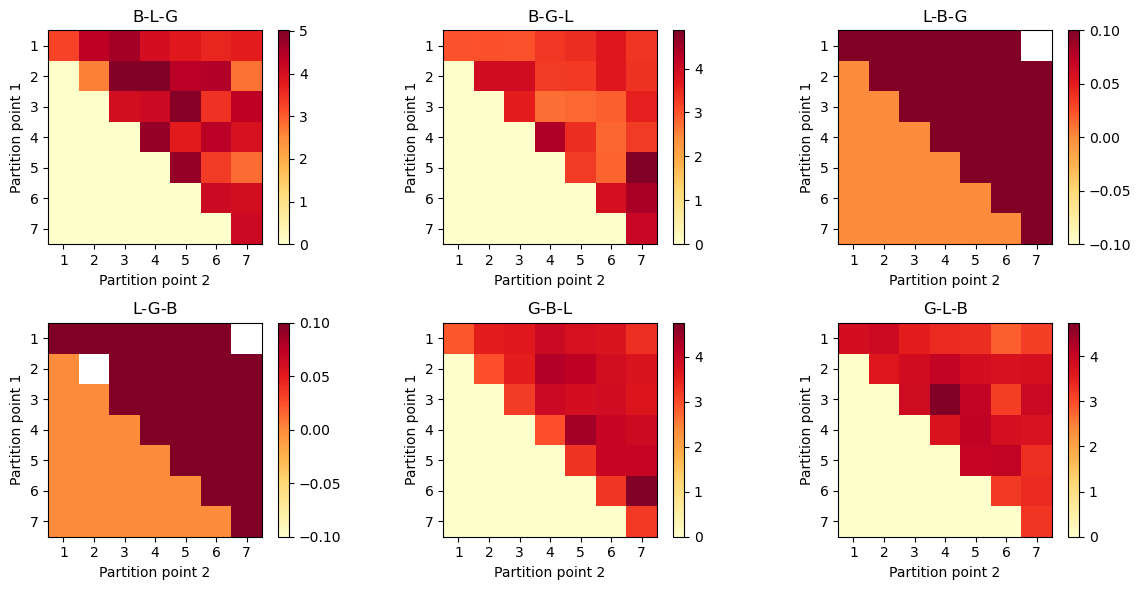

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

labels = ['1', '2', '3', '4', '5', '6', '7']

# Plot the heatmap with custom colors and annotations
im_blg = ax[0][0].imshow(low_blg_matrix, cmap='YlOrRd', vmin=low_blg_matrix.min(), vmax=low_blg_matrix.max())
im_bgl = ax[0][1].imshow(low_bgl_matrix, cmap='YlOrRd', vmin=low_bgl_matrix.min(), vmax=low_bgl_matrix.max())
im_lbg = ax[0][2].imshow(low_lbg_matrix, cmap='YlOrRd', vmin=low_lbg_matrix.min(), vmax=low_lbg_matrix.max())
im_lgb = ax[1][0].imshow(low_lgb_matrix, cmap='YlOrRd', vmin=low_lgb_matrix.min(), vmax=low_lgb_matrix.max())
im_gbl = ax[1][1].imshow(low_gbl_matrix, cmap='YlOrRd', vmin=low_gbl_matrix.min(), vmax=low_gbl_matrix.max())
im_glb = ax[1][2].imshow(low_glb_matrix, cmap='YlOrRd', vmin=low_glb_matrix.min(), vmax=low_glb_matrix.max())

# Add colorbar
cbar_blg = ax[0][0].figure.colorbar(im_blg, ax = ax[0][0])
cbar_bgl = ax[0][1].figure.colorbar(im_bgl, ax = ax[0][1])
cbar_lbg = ax[0][2].figure.colorbar(im_lbg, ax = ax[0][2])
cbar_lgb = ax[1][0].figure.colorbar(im_lgb, ax = ax[1][0])
cbar_gbl = ax[1][1].figure.colorbar(im_gbl, ax = ax[1][1])
cbar_glb = ax[1][2].figure.colorbar(im_glb, ax = ax[1][2])
 
# Set plot title and axis labels
ax[0][0].set_title("B-L-G")
ax[0][0].set_xlabel("Partition point 2")
ax[0][0].set_ylabel("Partition point 1")
ax[0][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][1].set_title("B-G-L")
ax[0][1].set_xlabel("Partition point 2")
ax[0][1].set_ylabel("Partition point 1")
ax[0][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][2].set_title("L-B-G")
ax[0][2].set_xlabel("Partition point 2")
ax[0][2].set_ylabel("Partition point 1")
ax[0][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][2].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][0].set_title("L-G-B")
ax[1][0].set_xlabel("Partition point 2")
ax[1][0].set_ylabel("Partition point 1")
ax[1][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][1].set_title("G-B-L")
ax[1][1].set_xlabel("Partition point 2")
ax[1][1].set_ylabel("Partition point 1")
ax[1][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][2].set_title("G-L-B")
ax[1][2].set_xlabel("Partition point 2")
ax[1][2].set_ylabel("Partition point 1")
ax[1][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][2].set_yticks(np.arange(len(labels)), labels=labels)

plt.tight_layout()
plt.savefig('heatmap-power_high_freq.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

# Two-patition Configurations

## Low Frequency

In [23]:
low_measurements = 'low_measurements.xlsx'
low_data = pd.read_excel(low_measurements)
two_partition = low_data.loc[low_data['partition point 1'] == 6]
two_partition = two_partition.loc[low_data['partition point 2'] == 6]

In [24]:
two_part_latency_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['Frame latency']
two_part_latency_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['Frame latency']
two_part_latency_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['Frame latency']
two_part_latency_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['Frame latency']
two_part_latency_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['Frame latency']
two_part_latency_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['Frame latency']

In [25]:
two_part_fps_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['Frame rate']
two_part_fps_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['Frame rate']
two_part_fps_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['Frame rate']
two_part_fps_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['Frame rate']
two_part_fps_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['Frame rate']
two_part_fps_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['Frame rate']

In [26]:
stage1_inference_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['stage1_inference_time']
stage1_inference_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['stage1_inference_time']
stage1_inference_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['stage1_inference_time']
stage1_inference_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['stage1_inference_time']
stage1_inference_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['stage1_inference_time']
stage1_inference_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['stage1_inference_time']

stage1_input_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['stage1_input_time']
stage1_input_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['stage1_input_time']
stage1_input_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['stage1_input_time']
stage1_input_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['stage1_input_time']
stage1_input_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['stage1_input_time']
stage1_input_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['stage1_input_time']

In [27]:
stage2_inference_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['stage3_inference_time']
stage2_inference_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['stage3_inference_time']
stage2_inference_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['stage3_inference_time']
stage2_inference_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['stage3_inference_time']
stage2_inference_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['stage3_inference_time']
stage2_inference_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['stage3_inference_time']

stage2_input_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['stage3_input_time']
stage2_input_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['stage3_input_time']
stage2_input_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['stage3_input_time']
stage2_input_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['stage3_input_time']
stage2_input_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['stage3_input_time']
stage2_input_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['stage3_input_time']

In [28]:
two_part_power_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['power']
two_part_power_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['power']
two_part_power_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['power']
two_part_power_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['power']
two_part_power_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['power']
two_part_power_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['power']

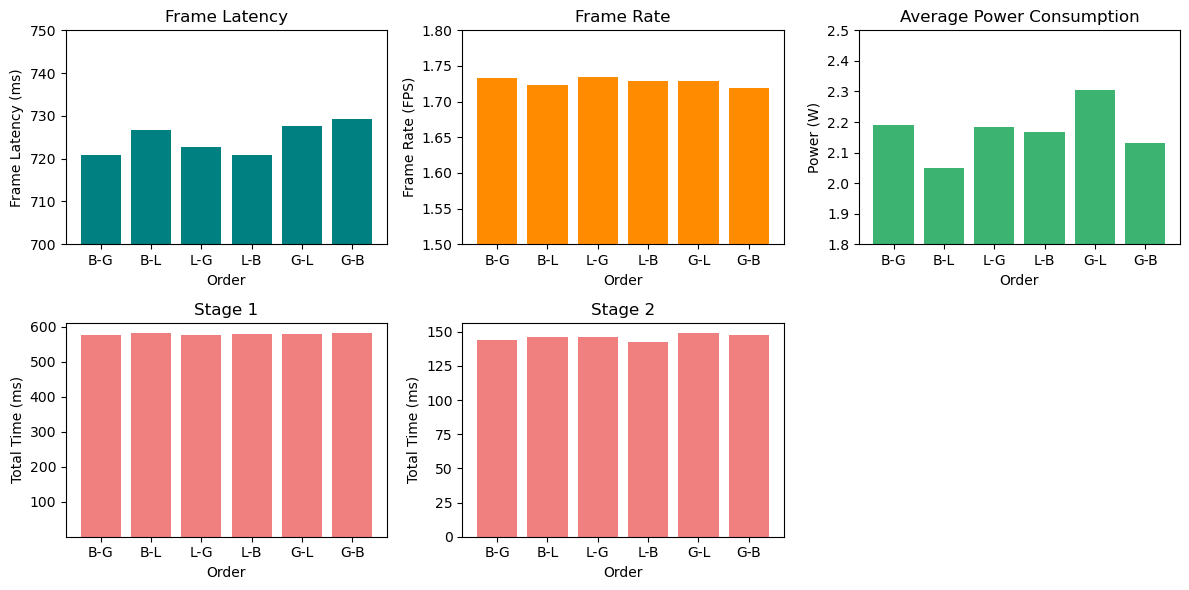

In [29]:
two_partition_latency = np.array([two_part_latency_blg, two_part_latency_bgl, two_part_latency_lbg, two_part_latency_lgb, 
                                  two_part_latency_gbl, two_part_latency_glb]).flatten()

two_partition_fps = np.array([two_part_fps_blg, two_part_fps_bgl, two_part_fps_lbg, two_part_fps_lgb, 
                              two_part_fps_gbl, two_part_fps_glb]).flatten()

two_partition_power = np.array([two_part_power_blg, two_part_power_bgl, two_part_power_lbg, two_part_power_lgb, 
                                two_part_power_gbl, two_part_power_glb]).flatten()

stage1_inference = np.array([stage1_inference_blg, stage1_inference_bgl, stage1_inference_lbg, stage1_inference_lgb, 
                             stage1_inference_gbl, stage1_inference_glb]).flatten()

stage1_input = np.array([stage1_input_blg, stage1_input_bgl, stage1_input_lbg, stage1_input_lgb, 
                         stage1_input_gbl, stage1_input_glb]).flatten()

stage2_inference = np.array([stage2_inference_blg, stage2_inference_bgl, stage2_inference_lbg, stage2_inference_lgb, 
                             stage2_inference_gbl, stage2_inference_glb]).flatten()

stage2_input = np.array([stage2_input_blg, stage2_input_bgl, stage2_input_lbg, stage2_input_lgb, 
                         stage2_input_gbl, stage2_input_glb]).flatten()

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

xlabels = np.array(['B-G', 'B-L', 'L-G', 'L-B', 'G-L', 'G-B'])

# Set plot title and axis labels
ax[0][0].bar(range(len(xlabels)), two_partition_latency, color='teal')
ax[0][0].set_title("Frame Latency")
ax[0][0].set_xlabel("Order")
ax[0][0].set_ylabel("Frame Latency (ms)")
ax[0][0].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0][0].set_ylim(700, 750)

ax[0][1].bar(range(len(xlabels)), two_partition_fps, color='darkorange')
ax[0][1].set_title("Frame Rate")
ax[0][1].set_xlabel("Order")
ax[0][1].set_ylabel("Frame Rate (FPS)")
ax[0][1].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0][1].set_ylim(1.50, 1.80)

ax[0][2].bar(range(len(xlabels)), two_partition_power, color='mediumseagreen')
ax[0][2].set_title("Average Power Consumption")
ax[0][2].set_xlabel("Order")
ax[0][2].set_ylabel("Power (W)")
ax[0][2].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0][2].set_ylim(1.80, 2.50)

ax[1][0].bar(range(len(xlabels)), stage1_input, color='lightgray')
ax[1][0].bar(range(len(xlabels)), stage1_inference, bottom=stage1_input, color='lightcoral')
ax[1][0].set_title("Stage 1")
ax[1][0].set_xlabel("Order")
ax[1][0].set_ylabel("Total Time (ms)")
ax[1][0].set_xticks(np.arange(len(xlabels)), labels=xlabels)

ax[1][1].bar(range(len(xlabels)), stage2_input, color='lightgray')
ax[1][1].bar(range(len(xlabels)), stage2_inference, bottom=stage2_input, color='lightcoral')
ax[1][1].set_title("Stage 2")
ax[1][1].set_xlabel("Order")
ax[1][1].set_ylabel("Total Time (ms)")
ax[1][1].set_xticks(np.arange(len(xlabels)), labels=xlabels)

ax[1][2].axis('off')

plt.tight_layout()
plt.savefig('two_partition_low.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

# High Frequency

In [30]:
high_measurements = 'high_measurements.xlsx'
high_data = pd.read_excel(high_measurements)
two_partition = high_data.loc[high_data['partition point 1'] == 6]
two_partition = two_partition.loc[high_data['partition point 2'] == 6]

In [31]:
two_part_latency_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['Frame latency']
two_part_latency_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['Frame latency']
two_part_latency_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['Frame latency']
two_part_latency_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['Frame latency']
two_part_latency_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['Frame latency']
two_part_latency_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['Frame latency']

In [32]:
two_part_fps_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['Frame rate']
two_part_fps_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['Frame rate']
two_part_fps_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['Frame rate']
two_part_fps_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['Frame rate']
two_part_fps_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['Frame rate']
two_part_fps_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['Frame rate']

In [33]:
stage1_inference_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['stage1_inference_time']
stage1_inference_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['stage1_inference_time']
stage1_inference_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['stage1_inference_time']
stage1_inference_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['stage1_inference_time']
stage1_inference_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['stage1_inference_time']
stage1_inference_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['stage1_inference_time']

stage1_input_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['stage1_input_time']
stage1_input_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['stage1_input_time']
stage1_input_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['stage1_input_time']
stage1_input_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['stage1_input_time']
stage1_input_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['stage1_input_time']
stage1_input_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['stage1_input_time']

In [34]:
stage2_inference_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['stage3_inference_time']
stage2_inference_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['stage3_inference_time']
stage2_inference_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['stage3_inference_time']
stage2_inference_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['stage3_inference_time']
stage2_inference_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['stage3_inference_time']
stage2_inference_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['stage3_inference_time']

stage2_input_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['stage3_input_time']
stage2_input_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['stage3_input_time']
stage2_input_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['stage3_input_time']
stage2_input_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['stage3_input_time']
stage2_input_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['stage3_input_time']
stage2_input_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['stage3_input_time']

In [35]:
two_part_power_blg = two_partition.loc[two_partition['order'] == 'B-L-G']['power']
two_part_power_bgl = two_partition.loc[two_partition['order'] == 'B-G-L']['power']
two_part_power_lbg = two_partition.loc[two_partition['order'] == 'L-B-G']['power']
two_part_power_lgb = two_partition.loc[two_partition['order'] == 'L-G-B']['power']
two_part_power_gbl = two_partition.loc[two_partition['order'] == 'G-B-L']['power']
two_part_power_glb = two_partition.loc[two_partition['order'] == 'G-L-B']['power']

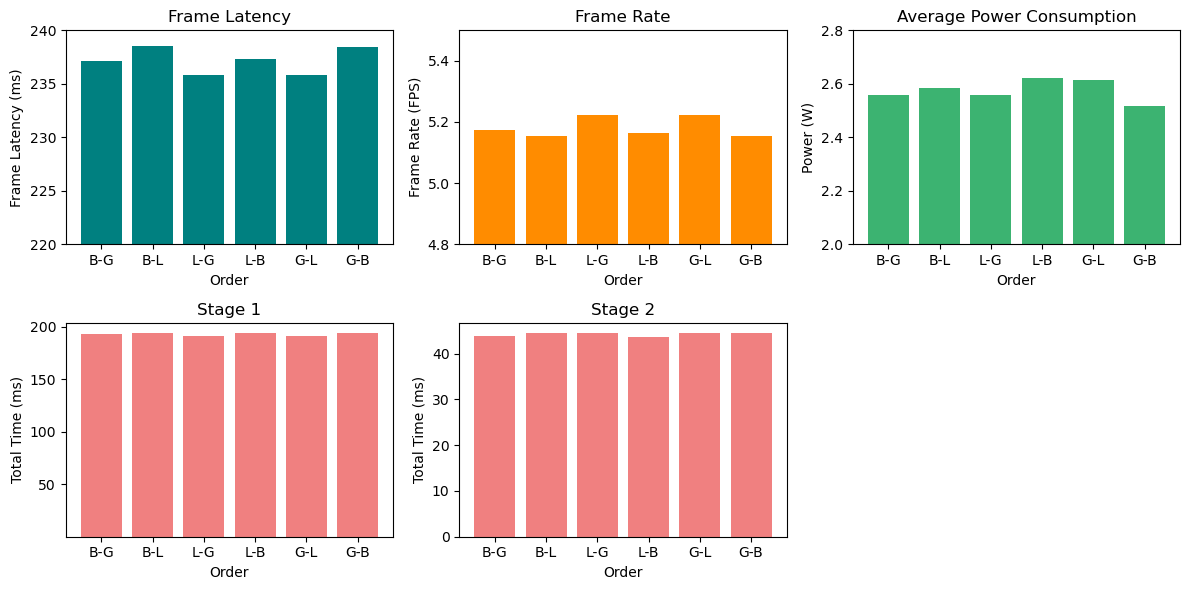

In [36]:
two_partition_latency = np.array([two_part_latency_blg, two_part_latency_bgl, two_part_latency_lbg, two_part_latency_lgb, 
                                  two_part_latency_gbl, two_part_latency_glb]).flatten()

two_partition_fps = np.array([two_part_fps_blg, two_part_fps_bgl, two_part_fps_lbg, two_part_fps_lgb, 
                              two_part_fps_gbl, two_part_fps_glb]).flatten()

two_partition_power = np.array([two_part_power_blg, two_part_power_bgl, two_part_power_lbg, two_part_power_lgb, 
                                two_part_power_gbl, two_part_power_glb]).flatten()

stage1_inference = np.array([stage1_inference_blg, stage1_inference_bgl, stage1_inference_lbg, stage1_inference_lgb, 
                             stage1_inference_gbl, stage1_inference_glb]).flatten()

stage1_input = np.array([stage1_input_blg, stage1_input_bgl, stage1_input_lbg, stage1_input_lgb, 
                         stage1_input_gbl, stage1_input_glb]).flatten()

stage2_inference = np.array([stage2_inference_blg, stage2_inference_bgl, stage2_inference_lbg, stage2_inference_lgb, 
                             stage2_inference_gbl, stage2_inference_glb]).flatten()

stage2_input = np.array([stage2_input_blg, stage2_input_bgl, stage2_input_lbg, stage2_input_lgb, 
                         stage2_input_gbl, stage2_input_glb]).flatten()

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

xlabels = np.array(['B-G', 'B-L', 'L-G', 'L-B', 'G-L', 'G-B'])

# Set plot title and axis labels
ax[0][0].bar(range(len(xlabels)), two_partition_latency, color='teal')
ax[0][0].set_title("Frame Latency")
ax[0][0].set_xlabel("Order")
ax[0][0].set_ylabel("Frame Latency (ms)")
ax[0][0].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0][0].set_ylim(220, 240)

ax[0][1].bar(range(len(xlabels)), two_partition_fps, color='darkorange')
ax[0][1].set_title("Frame Rate")
ax[0][1].set_xlabel("Order")
ax[0][1].set_ylabel("Frame Rate (FPS)")
ax[0][1].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0][1].set_ylim(4.80, 5.50)

ax[0][2].bar(range(len(xlabels)), two_partition_power, color='mediumseagreen')
ax[0][2].set_title("Average Power Consumption")
ax[0][2].set_xlabel("Order")
ax[0][2].set_ylabel("Power (W)")
ax[0][2].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0][2].set_ylim(2.00, 2.80)

ax[1][0].bar(range(len(xlabels)), stage1_input, color='lightgray')
ax[1][0].bar(range(len(xlabels)), stage1_inference, bottom=stage1_input, color='lightcoral')
ax[1][0].set_title("Stage 1")
ax[1][0].set_xlabel("Order")
ax[1][0].set_ylabel("Total Time (ms)")
ax[1][0].set_xticks(np.arange(len(xlabels)), labels=xlabels)

ax[1][1].bar(range(len(xlabels)), stage2_input, color='lightgray')
ax[1][1].bar(range(len(xlabels)), stage2_inference, bottom=stage2_input, color='lightcoral')
ax[1][1].set_title("Stage 2")
ax[1][1].set_xlabel("Order")
ax[1][1].set_ylabel("Total Time (ms)")
ax[1][1].set_xticks(np.arange(len(xlabels)), labels=xlabels)

ax[1][2].axis('off')

plt.tight_layout()
plt.savefig('two_partition_high.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

# Three-partition Configurations

## Frame Rate

### Low Frequency

In [37]:
low_measurements = 'low_measurements.xlsx'
low_data = pd.read_excel(low_measurements)

In [38]:
low_blg = low_data.loc[low_data['order'] == 'B-L-G']
low_blg_matrix = np.zeros((7, 7))

for row in range(len(low_blg)):
    partition1 = low_blg['partition point 1'].iloc[row]
    partition2 = low_blg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_blg_matrix[partition1 - 1][partition2 - 1] = low_blg['Frame rate'].iloc[row]

In [39]:
low_bgl = low_data.loc[low_data['order'] == 'B-G-L']
low_bgl_matrix = np.zeros((7, 7))

for row in range(len(low_bgl)):
    partition1 = low_bgl['partition point 1'].iloc[row]
    partition2 = low_bgl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_bgl_matrix[partition1 - 1][partition2 - 1] = low_bgl['Frame rate'].iloc[row]

In [40]:
low_lbg = low_data.loc[low_data['order'] == 'L-B-G']
low_lbg_matrix = np.zeros((7, 7))

for row in range(len(low_lbg)):
    partition1 = low_lbg['partition point 1'].iloc[row]
    partition2 = low_lbg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lbg_matrix[partition1 - 1][partition2 - 1] = low_lbg['Frame rate'].iloc[row]

In [41]:
low_lgb = low_data.loc[low_data['order'] == 'L-G-B']
low_lgb_matrix = np.zeros((7, 7))

for row in range(len(low_lgb)):
    partition1 = low_lgb['partition point 1'].iloc[row]
    partition2 = low_lgb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lgb_matrix[partition1 - 1][partition2 - 1] = low_lgb['Frame rate'].iloc[row]

In [42]:
low_gbl = low_data.loc[low_data['order'] == 'G-B-L']
low_gbl_matrix = np.zeros((7, 7))

for row in range(len(low_gbl)):
    partition1 = low_gbl['partition point 1'].iloc[row]
    partition2 = low_gbl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_gbl_matrix[partition1 - 1][partition2 - 1] = low_gbl['Frame rate'].iloc[row]

In [43]:
low_glb = low_data.loc[low_data['order'] == 'G-L-B']
low_glb_matrix = np.zeros((7, 7))

for row in range(len(low_glb)):
    partition1 = low_glb['partition point 1'].iloc[row]
    partition2 = low_glb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_glb_matrix[partition1 - 1][partition2 - 1] = low_glb['Frame rate'].iloc[row]

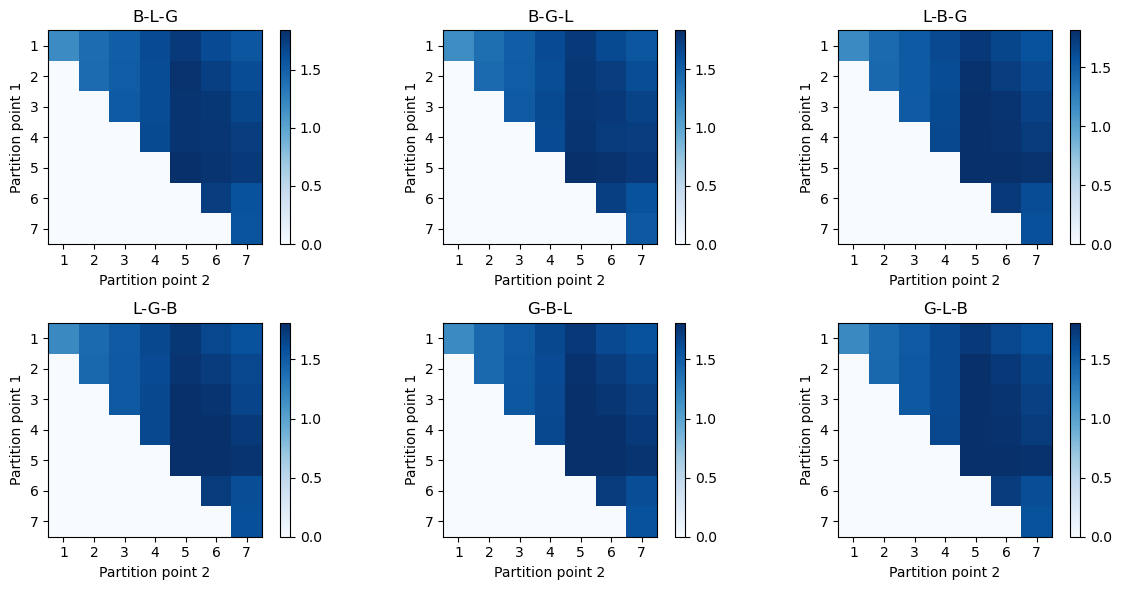

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

labels = ['1', '2', '3', '4', '5', '6', '7']

# Plot the heatmap with custom colors and annotations
im_blg = ax[0][0].imshow(low_blg_matrix, cmap='Blues', vmin=low_blg_matrix.min(), vmax=low_blg_matrix.max())
im_bgl = ax[0][1].imshow(low_bgl_matrix, cmap='Blues', vmin=low_bgl_matrix.min(), vmax=low_bgl_matrix.max())
im_lbg = ax[0][2].imshow(low_lbg_matrix, cmap='Blues', vmin=low_lbg_matrix.min(), vmax=low_lbg_matrix.max())
im_lgb = ax[1][0].imshow(low_lgb_matrix, cmap='Blues', vmin=low_lgb_matrix.min(), vmax=low_lgb_matrix.max())
im_gbl = ax[1][1].imshow(low_gbl_matrix, cmap='Blues', vmin=low_gbl_matrix.min(), vmax=low_gbl_matrix.max())
im_glb = ax[1][2].imshow(low_glb_matrix, cmap='Blues', vmin=low_glb_matrix.min(), vmax=low_glb_matrix.max())

# Add colorbar
cbar_blg = ax[0][0].figure.colorbar(im_blg, ax = ax[0][0])
cbar_bgl = ax[0][1].figure.colorbar(im_bgl, ax = ax[0][1])
cbar_lbg = ax[0][2].figure.colorbar(im_lbg, ax = ax[0][2])
cbar_lgb = ax[1][0].figure.colorbar(im_lgb, ax = ax[1][0])
cbar_gbl = ax[1][1].figure.colorbar(im_gbl, ax = ax[1][1])
cbar_glb = ax[1][2].figure.colorbar(im_glb, ax = ax[1][2])
 
# Set plot title and axis labels
ax[0][0].set_title("B-L-G")
ax[0][0].set_xlabel("Partition point 2")
ax[0][0].set_ylabel("Partition point 1")
ax[0][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][1].set_title("B-G-L")
ax[0][1].set_xlabel("Partition point 2")
ax[0][1].set_ylabel("Partition point 1")
ax[0][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][2].set_title("L-B-G")
ax[0][2].set_xlabel("Partition point 2")
ax[0][2].set_ylabel("Partition point 1")
ax[0][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][2].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][0].set_title("L-G-B")
ax[1][0].set_xlabel("Partition point 2")
ax[1][0].set_ylabel("Partition point 1")
ax[1][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][1].set_title("G-B-L")
ax[1][1].set_xlabel("Partition point 2")
ax[1][1].set_ylabel("Partition point 1")
ax[1][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][2].set_title("G-L-B")
ax[1][2].set_xlabel("Partition point 2")
ax[1][2].set_ylabel("Partition point 1")
ax[1][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][2].set_yticks(np.arange(len(labels)), labels=labels)

plt.tight_layout()
plt.savefig('heatmap-frame_rate_low_freq.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

## High Frequency

In [45]:
low_measurements = 'high_measurements.xlsx'
low_data = pd.read_excel(low_measurements)

In [46]:
low_blg = low_data.loc[low_data['order'] == 'B-L-G']
low_blg_matrix = np.zeros((7, 7))

for row in range(len(low_blg)):
    partition1 = low_blg['partition point 1'].iloc[row]
    partition2 = low_blg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_blg_matrix[partition1 - 1][partition2 - 1] = low_blg['Frame rate'].iloc[row]

In [47]:
low_bgl = low_data.loc[low_data['order'] == 'B-G-L']
low_bgl_matrix = np.zeros((7, 7))

for row in range(len(low_bgl)):
    partition1 = low_bgl['partition point 1'].iloc[row]
    partition2 = low_bgl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_bgl_matrix[partition1 - 1][partition2 - 1] = low_bgl['Frame rate'].iloc[row]

In [48]:
low_lbg = low_data.loc[low_data['order'] == 'L-B-G']
low_lbg_matrix = np.zeros((7, 7))

for row in range(len(low_lbg)):
    partition1 = low_lbg['partition point 1'].iloc[row]
    partition2 = low_lbg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lbg_matrix[partition1 - 1][partition2 - 1] = low_lbg['Frame rate'].iloc[row]

In [49]:
low_lgb = low_data.loc[low_data['order'] == 'L-G-B']
low_lgb_matrix = np.zeros((7, 7))

for row in range(len(low_lgb)):
    partition1 = low_lgb['partition point 1'].iloc[row]
    partition2 = low_lgb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lgb_matrix[partition1 - 1][partition2 - 1] = low_lgb['Frame rate'].iloc[row]

In [50]:
low_gbl = low_data.loc[low_data['order'] == 'G-B-L']
low_gbl_matrix = np.zeros((7, 7))

for row in range(len(low_gbl)):
    partition1 = low_gbl['partition point 1'].iloc[row]
    partition2 = low_gbl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_gbl_matrix[partition1 - 1][partition2 - 1] = low_gbl['Frame rate'].iloc[row]

In [51]:
low_glb = low_data.loc[low_data['order'] == 'G-L-B']
low_glb_matrix = np.zeros((7, 7))

for row in range(len(low_glb)):
    partition1 = low_glb['partition point 1'].iloc[row]
    partition2 = low_glb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_glb_matrix[partition1 - 1][partition2 - 1] = low_glb['Frame rate'].iloc[row]

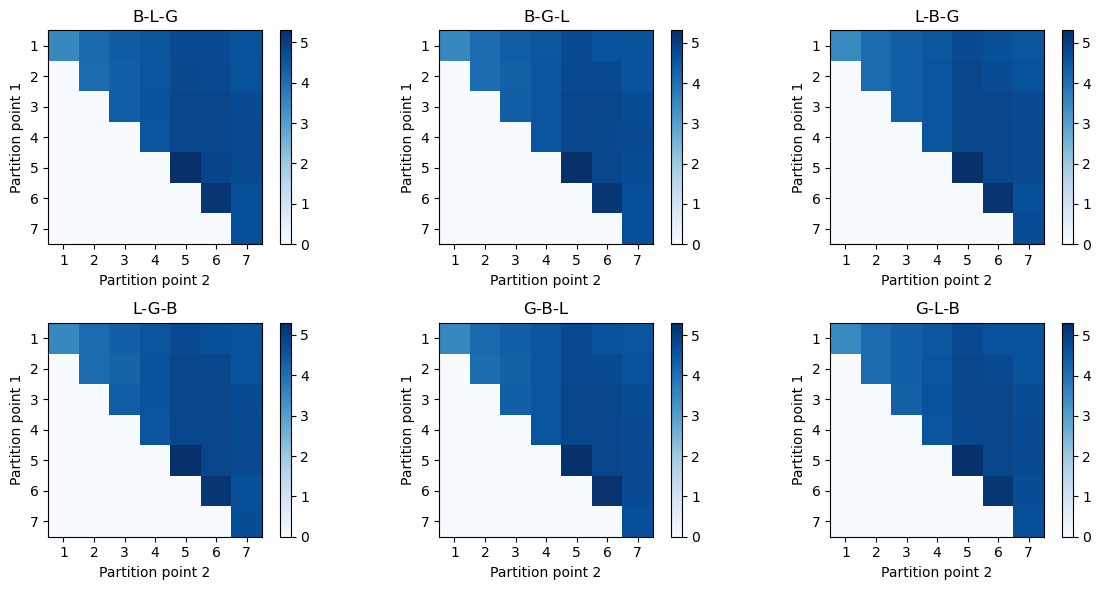

In [52]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

labels = ['1', '2', '3', '4', '5', '6', '7']

# Plot the heatmap with custom colors and annotations
im_blg = ax[0][0].imshow(low_blg_matrix, cmap='Blues', vmin=low_blg_matrix.min(), vmax=low_blg_matrix.max())
im_bgl = ax[0][1].imshow(low_bgl_matrix, cmap='Blues', vmin=low_bgl_matrix.min(), vmax=low_bgl_matrix.max())
im_lbg = ax[0][2].imshow(low_lbg_matrix, cmap='Blues', vmin=low_lbg_matrix.min(), vmax=low_lbg_matrix.max())
im_lgb = ax[1][0].imshow(low_lgb_matrix, cmap='Blues', vmin=low_lgb_matrix.min(), vmax=low_lgb_matrix.max())
im_gbl = ax[1][1].imshow(low_gbl_matrix, cmap='Blues', vmin=low_gbl_matrix.min(), vmax=low_gbl_matrix.max())
im_glb = ax[1][2].imshow(low_glb_matrix, cmap='Blues', vmin=low_glb_matrix.min(), vmax=low_glb_matrix.max())

# Add colorbar
cbar_blg = ax[0][0].figure.colorbar(im_blg, ax = ax[0][0])
cbar_bgl = ax[0][1].figure.colorbar(im_bgl, ax = ax[0][1])
cbar_lbg = ax[0][2].figure.colorbar(im_lbg, ax = ax[0][2])
cbar_lgb = ax[1][0].figure.colorbar(im_lgb, ax = ax[1][0])
cbar_gbl = ax[1][1].figure.colorbar(im_gbl, ax = ax[1][1])
cbar_glb = ax[1][2].figure.colorbar(im_glb, ax = ax[1][2])
 
# Set plot title and axis labels
ax[0][0].set_title("B-L-G")
ax[0][0].set_xlabel("Partition point 2")
ax[0][0].set_ylabel("Partition point 1")
ax[0][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][1].set_title("B-G-L")
ax[0][1].set_xlabel("Partition point 2")
ax[0][1].set_ylabel("Partition point 1")
ax[0][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][2].set_title("L-B-G")
ax[0][2].set_xlabel("Partition point 2")
ax[0][2].set_ylabel("Partition point 1")
ax[0][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][2].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][0].set_title("L-G-B")
ax[1][0].set_xlabel("Partition point 2")
ax[1][0].set_ylabel("Partition point 1")
ax[1][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][1].set_title("G-B-L")
ax[1][1].set_xlabel("Partition point 2")
ax[1][1].set_ylabel("Partition point 1")
ax[1][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][2].set_title("G-L-B")
ax[1][2].set_xlabel("Partition point 2")
ax[1][2].set_ylabel("Partition point 1")
ax[1][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][2].set_yticks(np.arange(len(labels)), labels=labels)

plt.tight_layout()
plt.savefig('heatmap-frame_rate_high_freq.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

## Frame Latency

### Low Frequency

In [53]:
low_measurements = 'low_measurements.xlsx'
low_data = pd.read_excel(low_measurements)

In [54]:
low_blg = low_data.loc[low_data['order'] == 'B-L-G']
low_blg_matrix = np.zeros((7, 7))

for row in range(len(low_blg)):
    partition1 = low_blg['partition point 1'].iloc[row]
    partition2 = low_blg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_blg_matrix[partition1 - 1][partition2 - 1] = low_blg['Frame latency'].iloc[row]

In [55]:
low_bgl = low_data.loc[low_data['order'] == 'B-G-L']
low_bgl_matrix = np.zeros((7, 7))

for row in range(len(low_bgl)):
    partition1 = low_bgl['partition point 1'].iloc[row]
    partition2 = low_bgl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_bgl_matrix[partition1 - 1][partition2 - 1] = low_bgl['Frame latency'].iloc[row]

In [56]:
low_lbg = low_data.loc[low_data['order'] == 'L-B-G']
low_lbg_matrix = np.zeros((7, 7))

for row in range(len(low_lbg)):
    partition1 = low_lbg['partition point 1'].iloc[row]
    partition2 = low_lbg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lbg_matrix[partition1 - 1][partition2 - 1] = low_lbg['Frame latency'].iloc[row]

In [57]:
low_lgb = low_data.loc[low_data['order'] == 'L-G-B']
low_lgb_matrix = np.zeros((7, 7))

for row in range(len(low_lgb)):
    partition1 = low_lgb['partition point 1'].iloc[row]
    partition2 = low_lgb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lgb_matrix[partition1 - 1][partition2 - 1] = low_lgb['Frame latency'].iloc[row]

In [58]:
low_gbl = low_data.loc[low_data['order'] == 'G-B-L']
low_gbl_matrix = np.zeros((7, 7))

for row in range(len(low_gbl)):
    partition1 = low_gbl['partition point 1'].iloc[row]
    partition2 = low_gbl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_gbl_matrix[partition1 - 1][partition2 - 1] = low_gbl['Frame latency'].iloc[row]

In [59]:
low_glb = low_data.loc[low_data['order'] == 'G-L-B']
low_glb_matrix = np.zeros((7, 7))

for row in range(len(low_glb)):
    partition1 = low_glb['partition point 1'].iloc[row]
    partition2 = low_glb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_glb_matrix[partition1 - 1][partition2 - 1] = low_glb['Frame latency'].iloc[row]

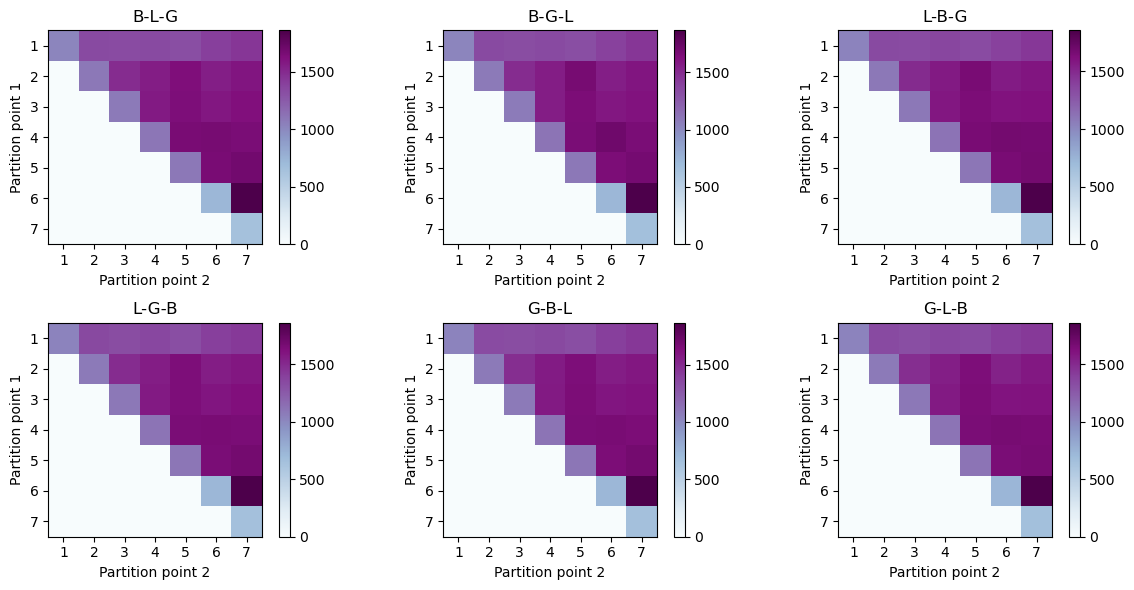

In [60]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

labels = ['1', '2', '3', '4', '5', '6', '7']

# Plot the heatmap with custom colors and annotations
im_blg = ax[0][0].imshow(low_blg_matrix, cmap='BuPu', vmin=low_blg_matrix.min(), vmax=low_blg_matrix.max())
im_bgl = ax[0][1].imshow(low_bgl_matrix, cmap='BuPu', vmin=low_bgl_matrix.min(), vmax=low_bgl_matrix.max())
im_lbg = ax[0][2].imshow(low_lbg_matrix, cmap='BuPu', vmin=low_lbg_matrix.min(), vmax=low_lbg_matrix.max())
im_lgb = ax[1][0].imshow(low_lgb_matrix, cmap='BuPu', vmin=low_lgb_matrix.min(), vmax=low_lgb_matrix.max())
im_gbl = ax[1][1].imshow(low_gbl_matrix, cmap='BuPu', vmin=low_gbl_matrix.min(), vmax=low_gbl_matrix.max())
im_glb = ax[1][2].imshow(low_glb_matrix, cmap='BuPu', vmin=low_glb_matrix.min(), vmax=low_glb_matrix.max())

# Add colorbar
cbar_blg = ax[0][0].figure.colorbar(im_blg, ax = ax[0][0])
cbar_bgl = ax[0][1].figure.colorbar(im_bgl, ax = ax[0][1])
cbar_lbg = ax[0][2].figure.colorbar(im_lbg, ax = ax[0][2])
cbar_lgb = ax[1][0].figure.colorbar(im_lgb, ax = ax[1][0])
cbar_gbl = ax[1][1].figure.colorbar(im_gbl, ax = ax[1][1])
cbar_glb = ax[1][2].figure.colorbar(im_glb, ax = ax[1][2])
 
# Set plot title and axis labels
ax[0][0].set_title("B-L-G")
ax[0][0].set_xlabel("Partition point 2")
ax[0][0].set_ylabel("Partition point 1")
ax[0][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][1].set_title("B-G-L")
ax[0][1].set_xlabel("Partition point 2")
ax[0][1].set_ylabel("Partition point 1")
ax[0][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][2].set_title("L-B-G")
ax[0][2].set_xlabel("Partition point 2")
ax[0][2].set_ylabel("Partition point 1")
ax[0][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][2].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][0].set_title("L-G-B")
ax[1][0].set_xlabel("Partition point 2")
ax[1][0].set_ylabel("Partition point 1")
ax[1][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][1].set_title("G-B-L")
ax[1][1].set_xlabel("Partition point 2")
ax[1][1].set_ylabel("Partition point 1")
ax[1][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][2].set_title("G-L-B")
ax[1][2].set_xlabel("Partition point 2")
ax[1][2].set_ylabel("Partition point 1")
ax[1][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][2].set_yticks(np.arange(len(labels)), labels=labels)

plt.tight_layout()
plt.savefig('heatmap-frame_latency_low_freq.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

### High Frequency

In [61]:
low_measurements = 'high_measurements.xlsx'
low_data = pd.read_excel(low_measurements)

In [62]:
low_blg = low_data.loc[low_data['order'] == 'B-L-G']
low_blg_matrix = np.zeros((7, 7))

for row in range(len(low_blg)):
    partition1 = low_blg['partition point 1'].iloc[row]
    partition2 = low_blg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_blg_matrix[partition1 - 1][partition2 - 1] = low_blg['Frame latency'].iloc[row]

In [63]:
low_bgl = low_data.loc[low_data['order'] == 'B-G-L']
low_bgl_matrix = np.zeros((7, 7))

for row in range(len(low_bgl)):
    partition1 = low_bgl['partition point 1'].iloc[row]
    partition2 = low_bgl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_bgl_matrix[partition1 - 1][partition2 - 1] = low_bgl['Frame latency'].iloc[row]

In [64]:
low_lbg = low_data.loc[low_data['order'] == 'L-B-G']
low_lbg_matrix = np.zeros((7, 7))

for row in range(len(low_lbg)):
    partition1 = low_lbg['partition point 1'].iloc[row]
    partition2 = low_lbg['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lbg_matrix[partition1 - 1][partition2 - 1] = low_lbg['Frame latency'].iloc[row]

In [65]:
low_lgb = low_data.loc[low_data['order'] == 'L-G-B']
low_lgb_matrix = np.zeros((7, 7))

for row in range(len(low_lgb)):
    partition1 = low_lgb['partition point 1'].iloc[row]
    partition2 = low_lgb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_lgb_matrix[partition1 - 1][partition2 - 1] = low_lgb['Frame latency'].iloc[row]

In [66]:
low_gbl = low_data.loc[low_data['order'] == 'G-B-L']
low_gbl_matrix = np.zeros((7, 7))

for row in range(len(low_gbl)):
    partition1 = low_gbl['partition point 1'].iloc[row]
    partition2 = low_gbl['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_gbl_matrix[partition1 - 1][partition2 - 1] = low_gbl['Frame latency'].iloc[row]

In [67]:
low_glb = low_data.loc[low_data['order'] == 'G-L-B']
low_glb_matrix = np.zeros((7, 7))

for row in range(len(low_glb)):
    partition1 = low_glb['partition point 1'].iloc[row]
    partition2 = low_glb['partition point 2'].iloc[row]
    if partition1 <= partition2:
        low_glb_matrix[partition1 - 1][partition2 - 1] = low_glb['Frame latency'].iloc[row]

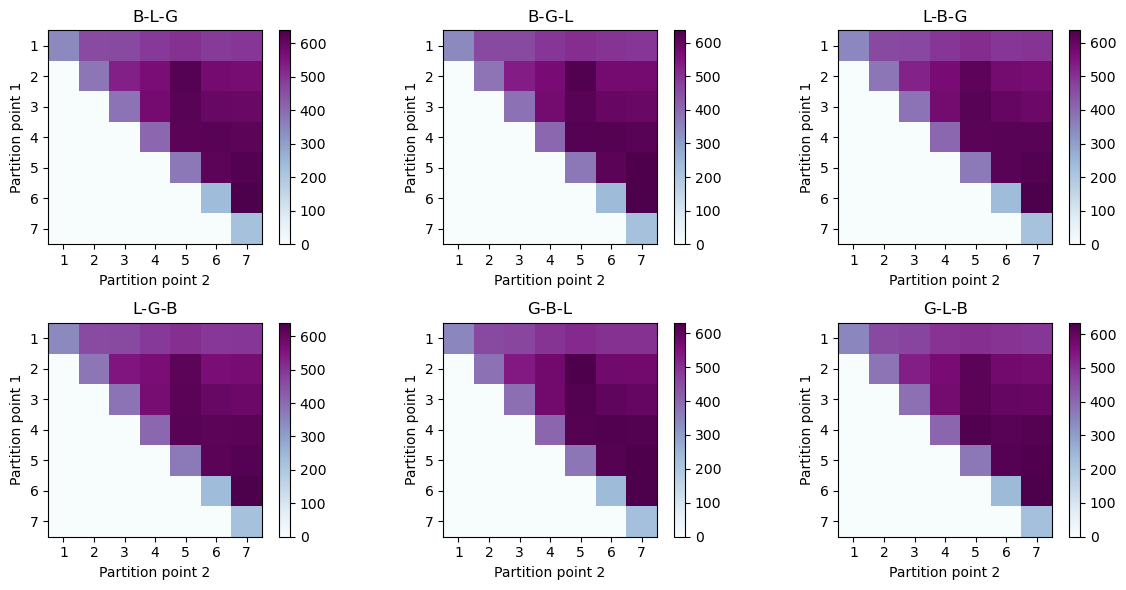

In [68]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

labels = ['1', '2', '3', '4', '5', '6', '7']

# Plot the heatmap with custom colors and annotations
im_blg = ax[0][0].imshow(low_blg_matrix, cmap='BuPu', vmin=low_blg_matrix.min(), vmax=low_blg_matrix.max())
im_bgl = ax[0][1].imshow(low_bgl_matrix, cmap='BuPu', vmin=low_bgl_matrix.min(), vmax=low_bgl_matrix.max())
im_lbg = ax[0][2].imshow(low_lbg_matrix, cmap='BuPu', vmin=low_lbg_matrix.min(), vmax=low_lbg_matrix.max())
im_lgb = ax[1][0].imshow(low_lgb_matrix, cmap='BuPu', vmin=low_lgb_matrix.min(), vmax=low_lgb_matrix.max())
im_gbl = ax[1][1].imshow(low_gbl_matrix, cmap='BuPu', vmin=low_gbl_matrix.min(), vmax=low_gbl_matrix.max())
im_glb = ax[1][2].imshow(low_glb_matrix, cmap='BuPu', vmin=low_glb_matrix.min(), vmax=low_glb_matrix.max())

# Add colorbar
cbar_blg = ax[0][0].figure.colorbar(im_blg, ax = ax[0][0])
cbar_bgl = ax[0][1].figure.colorbar(im_bgl, ax = ax[0][1])
cbar_lbg = ax[0][2].figure.colorbar(im_lbg, ax = ax[0][2])
cbar_lgb = ax[1][0].figure.colorbar(im_lgb, ax = ax[1][0])
cbar_gbl = ax[1][1].figure.colorbar(im_gbl, ax = ax[1][1])
cbar_glb = ax[1][2].figure.colorbar(im_glb, ax = ax[1][2])
 
# Set plot title and axis labels
ax[0][0].set_title("B-L-G")
ax[0][0].set_xlabel("Partition point 2")
ax[0][0].set_ylabel("Partition point 1")
ax[0][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][1].set_title("B-G-L")
ax[0][1].set_xlabel("Partition point 2")
ax[0][1].set_ylabel("Partition point 1")
ax[0][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[0][2].set_title("L-B-G")
ax[0][2].set_xlabel("Partition point 2")
ax[0][2].set_ylabel("Partition point 1")
ax[0][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[0][2].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][0].set_title("L-G-B")
ax[1][0].set_xlabel("Partition point 2")
ax[1][0].set_ylabel("Partition point 1")
ax[1][0].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][0].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][1].set_title("G-B-L")
ax[1][1].set_xlabel("Partition point 2")
ax[1][1].set_ylabel("Partition point 1")
ax[1][1].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][1].set_yticks(np.arange(len(labels)), labels=labels)

ax[1][2].set_title("G-L-B")
ax[1][2].set_xlabel("Partition point 2")
ax[1][2].set_ylabel("Partition point 1")
ax[1][2].set_xticks(np.arange(len(labels)), labels=labels)
ax[1][2].set_yticks(np.arange(len(labels)), labels=labels)

plt.tight_layout()
plt.savefig('heatmap-frame_latency_high_freq.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

## Stage 1

### Low Frequency

In [69]:
low_measurements = 'frequency-high-all.xlsx'
low_data = pd.read_excel(low_measurements)

In [70]:
stage1_inference_blg = low_data.loc[low_data['order'] == 'B-L-G']['stage1_inference_time']
stage1_inference_bgl = low_data.loc[low_data['order'] == 'B-G-L']['stage1_inference_time']
stage1_inference_lbg = low_data.loc[low_data['order'] == 'L-B-G']['stage1_inference_time']
stage1_inference_lgb = low_data.loc[low_data['order'] == 'L-G-B']['stage1_inference_time']
stage1_inference_gbl = low_data.loc[low_data['order'] == 'G-B-L']['stage1_inference_time']
stage1_inference_glb = low_data.loc[low_data['order'] == 'G-L-B']['stage1_inference_time']

stage1_input_blg = low_data.loc[low_data['order'] == 'B-L-G']['stage1_input_time']
stage1_input_bgl = low_data.loc[low_data['order'] == 'B-G-L']['stage1_input_time']
stage1_input_lbg = low_data.loc[low_data['order'] == 'L-B-G']['stage1_input_time']
stage1_input_lgb = low_data.loc[low_data['order'] == 'L-G-B']['stage1_input_time']
stage1_input_gbl = low_data.loc[low_data['order'] == 'G-B-L']['stage1_input_time']
stage1_input_glb = low_data.loc[low_data['order'] == 'G-L-B']['stage1_input_time']

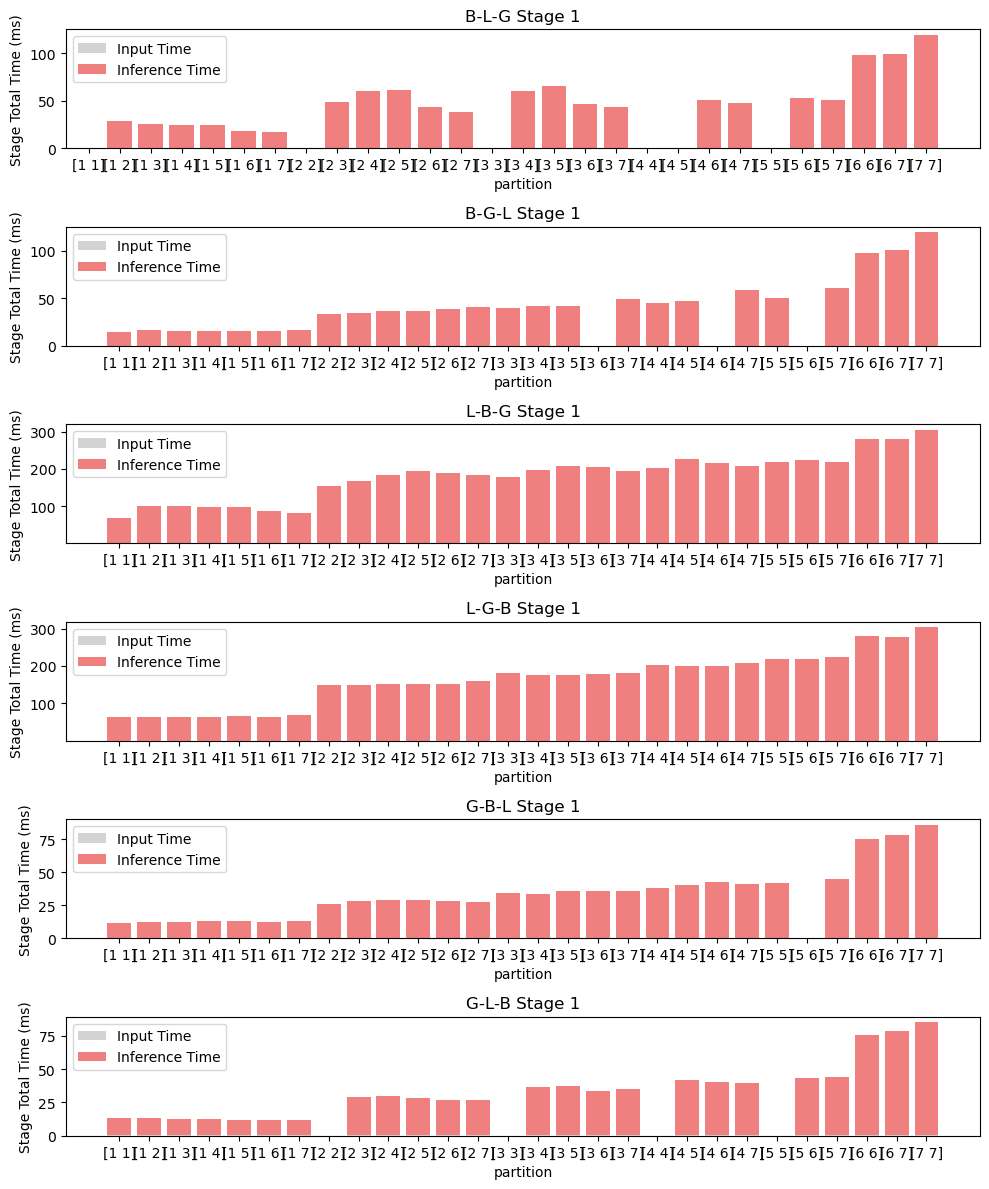

In [71]:
fig, ax = plt.subplots(6, 1, figsize=(10, 12))

xlabels = np.array(list(zip(low_data.loc[low_data['order'] == 'B-L-G']['partition point 1'],
                        low_data.loc[low_data['order'] == 'B-L-G']['partition point 2'])))

# Set plot title and axis labels
ax[0].bar(range(len(xlabels)), stage1_input_blg, color='lightgray', label='Input Time')
ax[0].bar(range(len(xlabels)), stage1_inference_blg, bottom=stage1_input_blg, color='lightcoral', label='Inference Time')
ax[0].set_title("B-L-G Stage 1")
ax[0].set_xlabel("partition")
ax[0].set_ylabel("Stage Total Time (ms)")
ax[0].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0].legend()

ax[1].bar(range(len(xlabels)), stage1_input_bgl, color='lightgray', label='Input Time')
ax[1].bar(range(len(xlabels)), stage1_inference_bgl, bottom=stage1_input_bgl, color='lightcoral', label='Inference Time')
ax[1].set_title("B-G-L Stage 1")
ax[1].set_xlabel("partition")
ax[1].set_ylabel("Stage Total Time (ms)")
ax[1].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[1].legend()

ax[2].bar(range(len(xlabels)), stage1_input_lbg, color='lightgray', label='Input Time')
ax[2].bar(range(len(xlabels)), stage1_inference_lbg, bottom=stage1_input_lbg, color='lightcoral', label='Inference Time')
ax[2].set_title("L-B-G Stage 1")
ax[2].set_xlabel("partition")
ax[2].set_ylabel("Stage Total Time (ms)")
ax[2].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[2].legend()

ax[3].bar(range(len(xlabels)), stage1_input_lgb, color='lightgray', label='Input Time')
ax[3].bar(range(len(xlabels)), stage1_inference_lgb, bottom=stage1_input_lgb, color='lightcoral', label='Inference Time')
ax[3].set_title("L-G-B Stage 1")
ax[3].set_xlabel("partition")
ax[3].set_ylabel("Stage Total Time (ms)")
ax[3].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[3].legend()

ax[4].bar(range(len(xlabels)), stage1_input_gbl, color='lightgray', label='Input Time')
ax[4].bar(range(len(xlabels)), stage1_inference_gbl, bottom=stage1_input_gbl, color='lightcoral', label='Inference Time')
ax[4].set_title("G-B-L Stage 1")
ax[4].set_xlabel("partition")
ax[4].set_ylabel("Stage Total Time (ms)")
ax[4].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[4].legend()

ax[5].bar(range(len(xlabels)), stage1_input_glb, color='lightgray', label='Input Time')
ax[5].bar(range(len(xlabels)), stage1_inference_glb, bottom=stage1_input_glb, color='lightcoral', label='Inference Time')
ax[5].set_title("G-L-B Stage 1")
ax[5].set_xlabel("partition")
ax[5].set_ylabel("Stage Total Time (ms)")
ax[5].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[5].legend()

plt.tight_layout()
plt.savefig('stage1_time.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

In [72]:
stage2_inference_blg = low_data.loc[low_data['order'] == 'B-L-G']['stage2_inference_time']
stage2_inference_bgl = low_data.loc[low_data['order'] == 'B-G-L']['stage2_inference_time']
stage2_inference_lbg = low_data.loc[low_data['order'] == 'L-B-G']['stage2_inference_time']
stage2_inference_lgb = low_data.loc[low_data['order'] == 'L-G-B']['stage2_inference_time']
stage2_inference_gbl = low_data.loc[low_data['order'] == 'G-B-L']['stage2_inference_time']
stage2_inference_glb = low_data.loc[low_data['order'] == 'G-L-B']['stage2_inference_time']

stage2_input_blg = low_data.loc[low_data['order'] == 'B-L-G']['stage2_input_time']
stage2_input_bgl = low_data.loc[low_data['order'] == 'B-G-L']['stage2_input_time']
stage2_input_lbg = low_data.loc[low_data['order'] == 'L-B-G']['stage2_input_time']
stage2_input_lgb = low_data.loc[low_data['order'] == 'L-G-B']['stage2_input_time']
stage2_input_gbl = low_data.loc[low_data['order'] == 'G-B-L']['stage2_input_time']
stage2_input_glb = low_data.loc[low_data['order'] == 'G-L-B']['stage2_input_time']

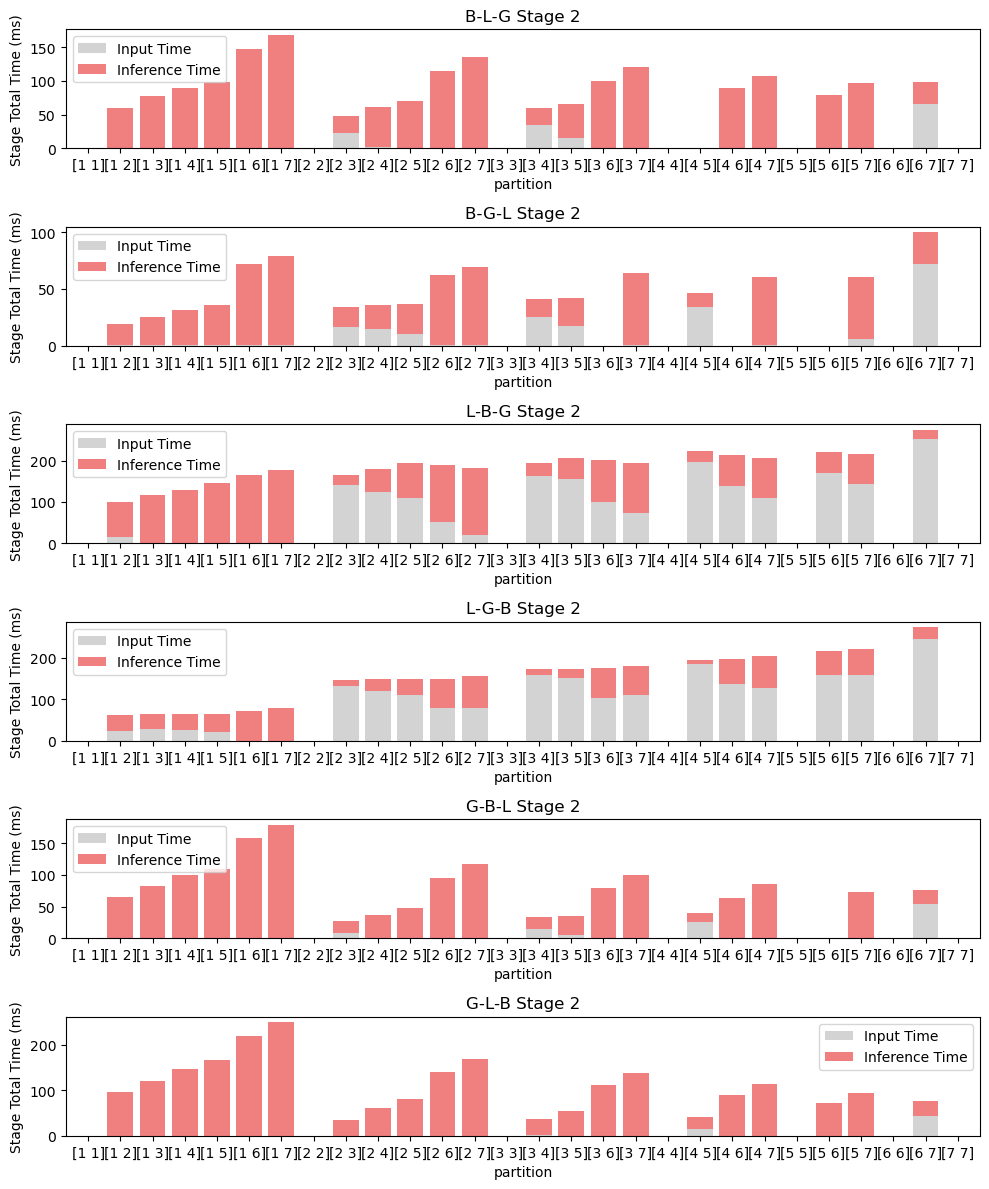

In [73]:
fig, ax = plt.subplots(6, 1, figsize=(10, 12))

xlabels = np.array(list(zip(low_data.loc[low_data['order'] == 'B-L-G']['partition point 1'],
                        low_data.loc[low_data['order'] == 'B-L-G']['partition point 2'])))

# Set plot title and axis labels
ax[0].bar(range(len(xlabels)), stage2_input_blg, color='lightgray', label='Input Time')
ax[0].bar(range(len(xlabels)), stage2_inference_blg, bottom=stage2_input_blg, color='lightcoral', label='Inference Time')
ax[0].set_title("B-L-G Stage 2")
ax[0].set_xlabel("partition")
ax[0].set_ylabel("Stage Total Time (ms)")
ax[0].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0].legend()

ax[1].bar(range(len(xlabels)), stage2_input_bgl, color='lightgray', label='Input Time')
ax[1].bar(range(len(xlabels)), stage2_inference_bgl, bottom=stage2_input_bgl, color='lightcoral', label='Inference Time')
ax[1].set_title("B-G-L Stage 2")
ax[1].set_xlabel("partition")
ax[1].set_ylabel("Stage Total Time (ms)")
ax[1].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[1].legend()

ax[2].bar(range(len(xlabels)), stage2_input_lbg, color='lightgray', label='Input Time')
ax[2].bar(range(len(xlabels)), stage2_inference_lbg, bottom=stage2_input_lbg, color='lightcoral', label='Inference Time')
ax[2].set_title("L-B-G Stage 2")
ax[2].set_xlabel("partition")
ax[2].set_ylabel("Stage Total Time (ms)")
ax[2].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[2].legend()

ax[3].bar(range(len(xlabels)), stage2_input_lgb, color='lightgray', label='Input Time')
ax[3].bar(range(len(xlabels)), stage2_inference_lgb, bottom=stage2_input_lgb, color='lightcoral', label='Inference Time')
ax[3].set_title("L-G-B Stage 2")
ax[3].set_xlabel("partition")
ax[3].set_ylabel("Stage Total Time (ms)")
ax[3].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[3].legend()

ax[4].bar(range(len(xlabels)), stage2_input_gbl, color='lightgray', label='Input Time')
ax[4].bar(range(len(xlabels)), stage2_inference_gbl, bottom=stage2_input_gbl, color='lightcoral', label='Inference Time')
ax[4].set_title("G-B-L Stage 2")
ax[4].set_xlabel("partition")
ax[4].set_ylabel("Stage Total Time (ms)")
ax[4].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[4].legend()

ax[5].bar(range(len(xlabels)), stage2_input_glb, color='lightgray', label='Input Time')
ax[5].bar(range(len(xlabels)), stage2_inference_glb, bottom=stage2_input_glb, color='lightcoral', label='Inference Time')
ax[5].set_title("G-L-B Stage 2")
ax[5].set_xlabel("partition")
ax[5].set_ylabel("Stage Total Time (ms)")
ax[5].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[5].legend()

plt.tight_layout()
plt.savefig('stage2_time.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

In [74]:
stage3_inference_blg = low_data.loc[low_data['order'] == 'B-L-G']['stage3_inference_time']
stage3_inference_bgl = low_data.loc[low_data['order'] == 'B-G-L']['stage3_inference_time']
stage3_inference_lbg = low_data.loc[low_data['order'] == 'L-B-G']['stage3_inference_time']
stage3_inference_lgb = low_data.loc[low_data['order'] == 'L-G-B']['stage3_inference_time']
stage3_inference_gbl = low_data.loc[low_data['order'] == 'G-B-L']['stage3_inference_time']
stage3_inference_glb = low_data.loc[low_data['order'] == 'G-L-B']['stage3_inference_time']

stage3_input_blg = low_data.loc[low_data['order'] == 'B-L-G']['stage3_input_time']
stage3_input_bgl = low_data.loc[low_data['order'] == 'B-G-L']['stage3_input_time']
stage3_input_lbg = low_data.loc[low_data['order'] == 'L-B-G']['stage3_input_time']
stage3_input_lgb = low_data.loc[low_data['order'] == 'L-G-B']['stage3_input_time']
stage3_input_gbl = low_data.loc[low_data['order'] == 'G-B-L']['stage3_input_time']
stage3_input_glb = low_data.loc[low_data['order'] == 'G-L-B']['stage3_input_time']

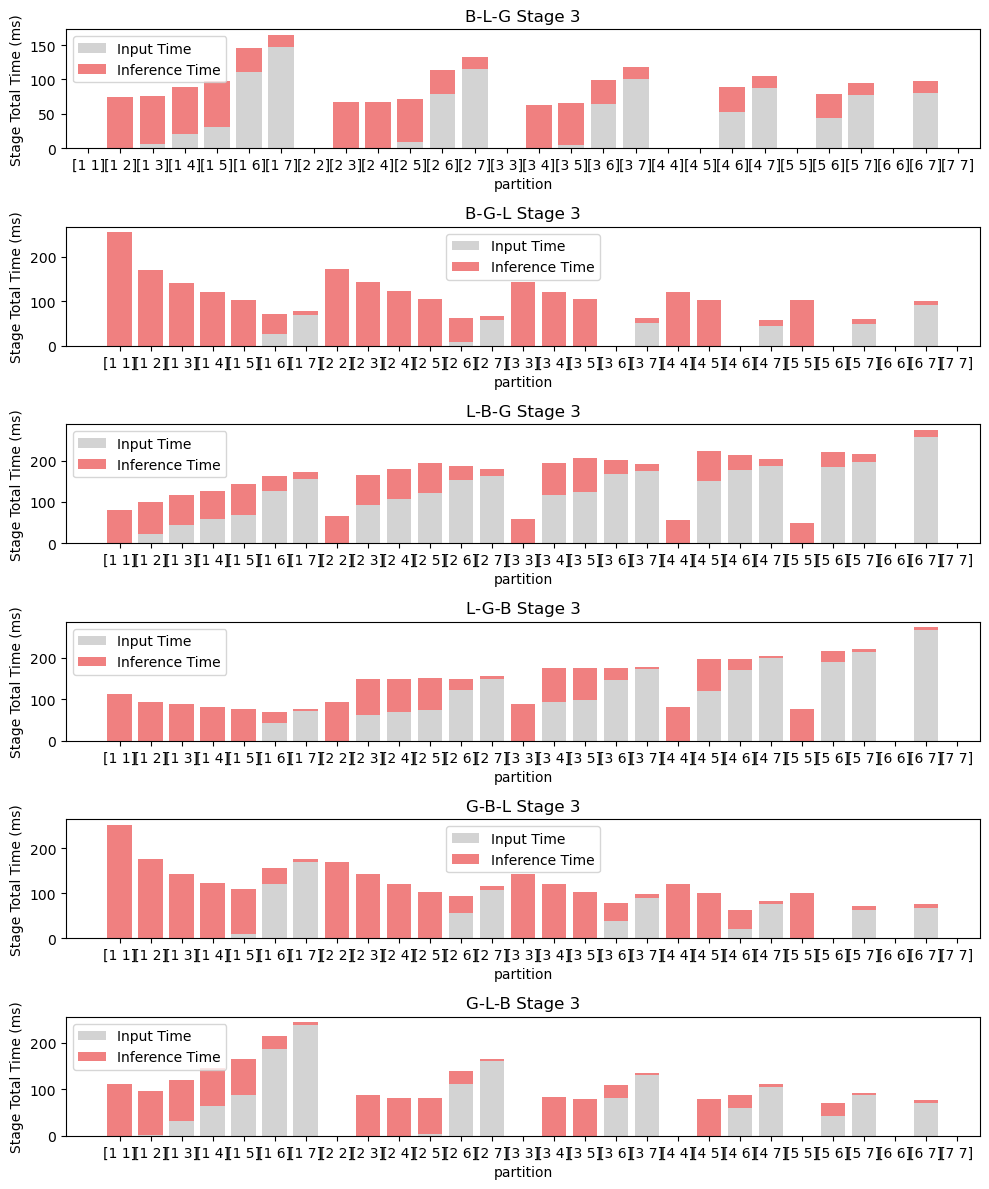

In [75]:
fig, ax = plt.subplots(6, 1, figsize=(10, 12))

xlabels = np.array(list(zip(low_data.loc[low_data['order'] == 'B-L-G']['partition point 1'],
                        low_data.loc[low_data['order'] == 'B-L-G']['partition point 2'])))

# Set plot title and axis labels
ax[0].bar(range(len(xlabels)), stage3_input_blg, color='lightgray', label='Input Time')
ax[0].bar(range(len(xlabels)), stage3_inference_blg, bottom=stage3_input_blg, color='lightcoral', label='Inference Time')
ax[0].set_title("B-L-G Stage 3")
ax[0].set_xlabel("partition")
ax[0].set_ylabel("Stage Total Time (ms)")
ax[0].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[0].legend()

ax[1].bar(range(len(xlabels)), stage3_input_bgl, color='lightgray', label='Input Time')
ax[1].bar(range(len(xlabels)), stage3_inference_bgl, bottom=stage3_input_bgl, color='lightcoral', label='Inference Time')
ax[1].set_title("B-G-L Stage 3")
ax[1].set_xlabel("partition")
ax[1].set_ylabel("Stage Total Time (ms)")
ax[1].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[1].legend()

ax[2].bar(range(len(xlabels)), stage3_input_lbg, color='lightgray', label='Input Time')
ax[2].bar(range(len(xlabels)), stage3_inference_lbg, bottom=stage3_input_lbg, color='lightcoral', label='Inference Time')
ax[2].set_title("L-B-G Stage 3")
ax[2].set_xlabel("partition")
ax[2].set_ylabel("Stage Total Time (ms)")
ax[2].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[2].legend()

ax[3].bar(range(len(xlabels)), stage3_input_lgb, color='lightgray', label='Input Time')
ax[3].bar(range(len(xlabels)), stage3_inference_lgb, bottom=stage3_input_lgb, color='lightcoral', label='Inference Time')
ax[3].set_title("L-G-B Stage 3")
ax[3].set_xlabel("partition")
ax[3].set_ylabel("Stage Total Time (ms)")
ax[3].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[3].legend()

ax[4].bar(range(len(xlabels)), stage3_input_gbl, color='lightgray', label='Input Time')
ax[4].bar(range(len(xlabels)), stage3_inference_gbl, bottom=stage3_input_gbl, color='lightcoral', label='Inference Time')
ax[4].set_title("G-B-L Stage 3")
ax[4].set_xlabel("partition")
ax[4].set_ylabel("Stage Total Time (ms)")
ax[4].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[4].legend()

ax[5].bar(range(len(xlabels)), stage3_input_glb, color='lightgray', label='Input Time')
ax[5].bar(range(len(xlabels)), stage3_inference_glb, bottom=stage3_input_glb, color='lightcoral', label='Inference Time')
ax[5].set_title("G-L-B Stage 3")
ax[5].set_xlabel("partition")
ax[5].set_ylabel("Stage Total Time (ms)")
ax[5].set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax[5].legend()

plt.tight_layout()
plt.savefig('stage3_time.png', bbox_inches="tight", dpi=300)
# Display the plot
plt.show()

In [76]:
high_measurements = 'frequency-high-all.xlsx'
high_data = pd.read_excel(high_measurements)

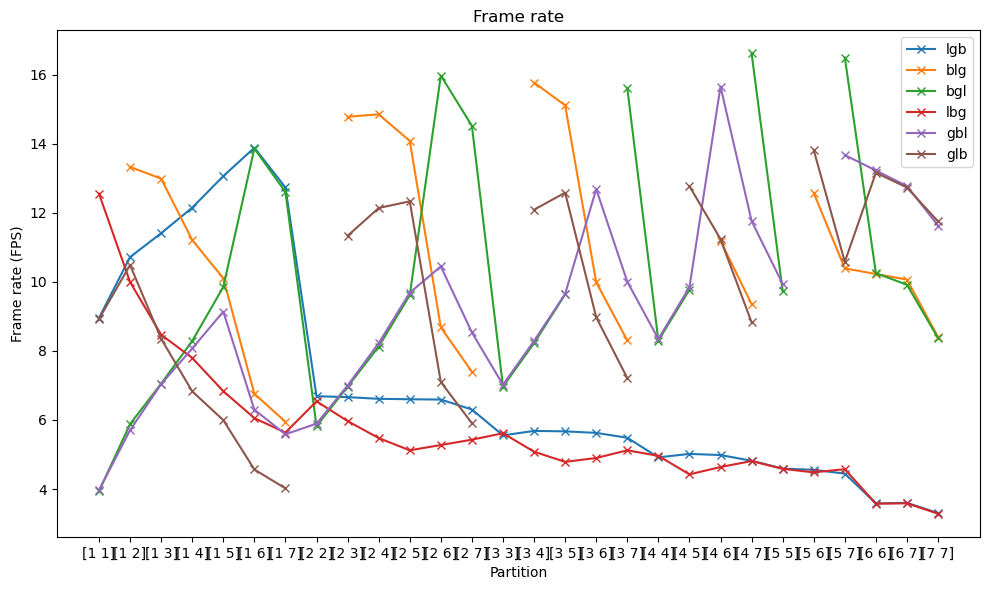

In [77]:
high_lgb = high_data.loc[low_data['order'] == 'L-G-B']['Frame rate']
high_blg = high_data.loc[low_data['order'] == 'B-L-G']['Frame rate']
high_bgl = high_data.loc[low_data['order'] == 'B-G-L']['Frame rate']
high_lbg = high_data.loc[low_data['order'] == 'L-B-G']['Frame rate']
high_gbl = high_data.loc[low_data['order'] == 'G-B-L']['Frame rate']
high_glb = high_data.loc[low_data['order'] == 'G-L-B']['Frame rate']

plt.figure(figsize=(10, 6))
plt.plot(range(len(high_lgb)), high_lgb, label='lgb', marker='x')
plt.plot(range(len(high_blg)), high_blg, label='blg', marker='x')
plt.plot(range(len(high_bgl)), high_bgl, label='bgl', marker='x')
plt.plot(range(len(high_lbg)), high_lbg, label='lbg', marker='x')
plt.plot(range(len(high_gbl)), high_gbl, label='gbl', marker='x')
plt.plot(range(len(high_glb)), high_glb, label='glb', marker='x')
plt.xticks(np.arange(len(xlabels)), labels=xlabels)
plt.xlabel('Partition')
plt.ylabel('Frame rate (FPS)')
plt.title('Frame rate')
plt.legend()
plt.tight_layout()
plt.savefig('Frame_rate.png', bbox_inches="tight", dpi=300)
plt.show()

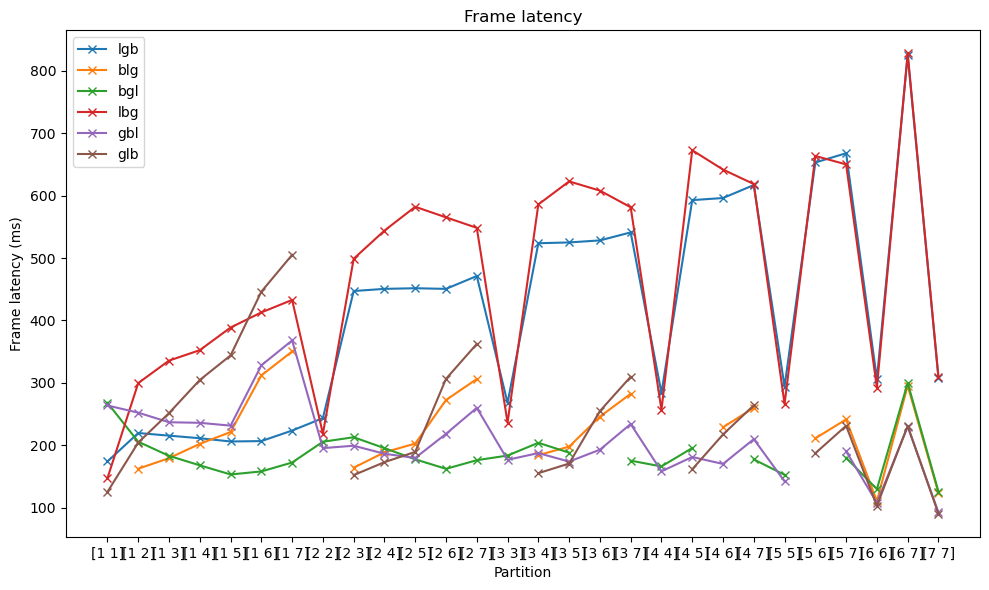

In [78]:
high_lgb = high_data.loc[low_data['order'] == 'L-G-B']['Frame latency']
high_blg = high_data.loc[low_data['order'] == 'B-L-G']['Frame latency']
high_bgl = high_data.loc[low_data['order'] == 'B-G-L']['Frame latency']
high_lbg = high_data.loc[low_data['order'] == 'L-B-G']['Frame latency']
high_gbl = high_data.loc[low_data['order'] == 'G-B-L']['Frame latency']
high_glb = high_data.loc[low_data['order'] == 'G-L-B']['Frame latency']

plt.figure(figsize=(10, 6))
plt.plot(range(len(high_lgb)), high_lgb, label='lgb', marker='x')
plt.plot(range(len(high_blg)), high_blg, label='blg', marker='x')
plt.plot(range(len(high_bgl)), high_bgl, label='bgl', marker='x')
plt.plot(range(len(high_lbg)), high_lbg, label='lbg', marker='x')
plt.plot(range(len(high_gbl)), high_gbl, label='gbl', marker='x')
plt.plot(range(len(high_glb)), high_glb, label='glb', marker='x')
plt.xticks(np.arange(len(xlabels)), labels=xlabels)
plt.xlabel('Partition')
plt.ylabel('Frame latency (ms)')
plt.title('Frame latency')
plt.legend()
plt.tight_layout()
plt.savefig('Frame_latency.png', bbox_inches="tight", dpi=300)
plt.show()

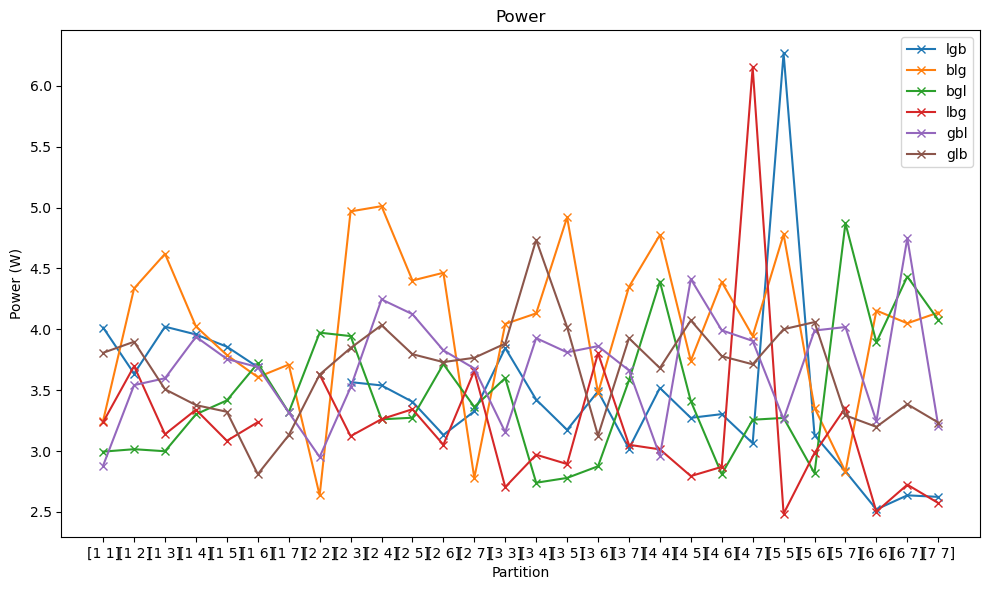

In [79]:
high_lgb = high_data.loc[low_data['order'] == 'L-G-B']['power']
high_blg = high_data.loc[low_data['order'] == 'B-L-G']['power']
high_bgl = high_data.loc[low_data['order'] == 'B-G-L']['power']
high_lbg = high_data.loc[low_data['order'] == 'L-B-G']['power']
high_gbl = high_data.loc[low_data['order'] == 'G-B-L']['power']
high_glb = high_data.loc[low_data['order'] == 'G-L-B']['power']

plt.figure(figsize=(10, 6))
plt.plot(range(len(high_lgb)), high_lgb, label='lgb', marker='x')
plt.plot(range(len(high_blg)), high_blg, label='blg', marker='x')
plt.plot(range(len(high_bgl)), high_bgl, label='bgl', marker='x')
plt.plot(range(len(high_lbg)), high_lbg, label='lbg', marker='x')
plt.plot(range(len(high_gbl)), high_gbl, label='gbl', marker='x')
plt.plot(range(len(high_glb)), high_glb, label='glb', marker='x')
plt.xticks(np.arange(len(xlabels)), labels=xlabels)
plt.xlabel('Partition')
plt.ylabel('Power (W)')
plt.title('Power')
plt.legend()
plt.tight_layout()
plt.savefig('Power.png', bbox_inches="tight", dpi=300)
plt.show()

In [80]:
high_measurements = 'low_measurements.xlsx'
high_data = pd.read_excel(high_measurements)

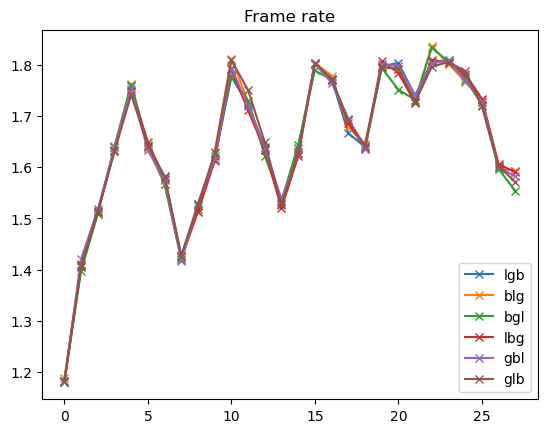

In [81]:
high_lgb = high_data.loc[low_data['order'] == 'L-G-B']['Frame rate']
high_blg = high_data.loc[low_data['order'] == 'B-L-G']['Frame rate']
high_bgl = high_data.loc[low_data['order'] == 'B-G-L']['Frame rate']
high_lbg = high_data.loc[low_data['order'] == 'L-B-G']['Frame rate']
high_gbl = high_data.loc[low_data['order'] == 'G-B-L']['Frame rate']
high_glb = high_data.loc[low_data['order'] == 'G-L-B']['Frame rate']

plt.plot(range(len(high_lgb)), high_lgb, label='lgb', marker='x')
plt.plot(range(len(high_blg)), high_blg, label='blg', marker='x')
plt.plot(range(len(high_bgl)), high_bgl, label='bgl', marker='x')
plt.plot(range(len(high_lbg)), high_lbg, label='lbg', marker='x')
plt.plot(range(len(high_gbl)), high_gbl, label='gbl', marker='x')
plt.plot(range(len(high_glb)), high_glb, label='glb', marker='x')
plt.title('Frame rate')
plt.legend()
plt.show()

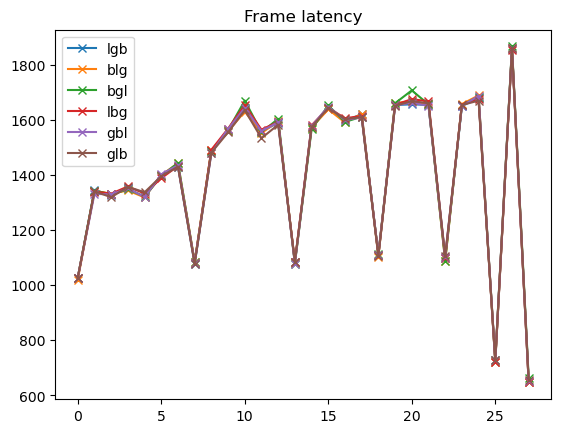

In [82]:
high_lgb = high_data.loc[low_data['order'] == 'L-G-B']['Frame latency']
high_blg = high_data.loc[low_data['order'] == 'B-L-G']['Frame latency']
high_bgl = high_data.loc[low_data['order'] == 'B-G-L']['Frame latency']
high_lbg = high_data.loc[low_data['order'] == 'L-B-G']['Frame latency']
high_gbl = high_data.loc[low_data['order'] == 'G-B-L']['Frame latency']
high_glb = high_data.loc[low_data['order'] == 'G-L-B']['Frame latency']

plt.plot(range(len(high_lgb)), high_lgb, label='lgb', marker='x')
plt.plot(range(len(high_blg)), high_blg, label='blg', marker='x')
plt.plot(range(len(high_bgl)), high_bgl, label='bgl', marker='x')
plt.plot(range(len(high_lbg)), high_lbg, label='lbg', marker='x')
plt.plot(range(len(high_gbl)), high_gbl, label='gbl', marker='x')
plt.plot(range(len(high_glb)), high_glb, label='glb', marker='x')
plt.title('Frame latency')
plt.legend()
plt.show()

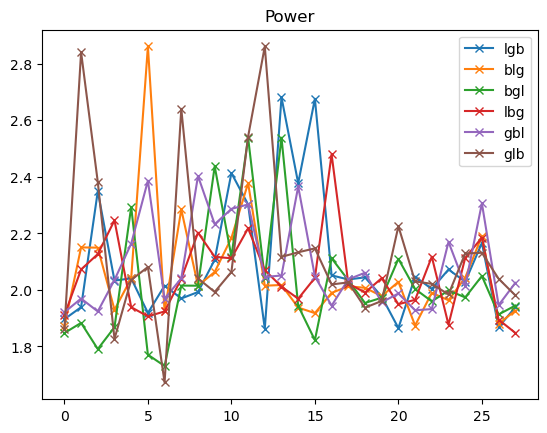

In [83]:
high_lgb = high_data.loc[low_data['order'] == 'L-G-B']['power']
high_blg = high_data.loc[low_data['order'] == 'B-L-G']['power']
high_bgl = high_data.loc[low_data['order'] == 'B-G-L']['power']
high_lbg = high_data.loc[low_data['order'] == 'L-B-G']['power']
high_gbl = high_data.loc[low_data['order'] == 'G-B-L']['power']
high_glb = high_data.loc[low_data['order'] == 'G-L-B']['power']

plt.plot(range(len(high_lgb)), high_lgb, label='lgb', marker='x')
plt.plot(range(len(high_blg)), high_blg, label='blg', marker='x')
plt.plot(range(len(high_bgl)), high_bgl, label='bgl', marker='x')
plt.plot(range(len(high_lbg)), high_lbg, label='lbg', marker='x')
plt.plot(range(len(high_gbl)), high_gbl, label='gbl', marker='x')
plt.plot(range(len(high_glb)), high_glb, label='glb', marker='x')
plt.title('Power')
plt.legend()
plt.show()